The goal here is to predict what the overall customer rating of a product using the following information about the product: price, product description, review text, review summary, review time and a picture of the product.


First, let's get a an idea of what kind of data we have.

In [13]:
#Code provided by Julian McAuley, UCSD http://jmcauley.ucsd.edu/data/amazon/
import pandas as pd 
import gzip 
def parse(path):
    g = gzip.open(path, 'rb') 
    for l in g:
        yield eval(l) 
def getDF(path):
    i = 0 
    df = {} 
    for d in parse(path):
        df[i] = d
        i += 1 
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/media/wcowart/OS/Amazon Review Dataset/reviews_Musical_Instruments.json.gz')

In [14]:
df.describe()

,unixReviewTime,overall
count,5.001760e+05,500176.000000
mean,1.344561e+09,4.244350
std,6.487853e+07,1.203374
min,8.934624e+08,1.000000
25%,1.325030e+09,4.000000
50%,1.364342e+09,5.000000
75%,1.388189e+09,5.000000
max,1.406074e+09,5.000000


Let's quickly go over what features are available in the dataset

## Data Understanding

Summary; reviewer provided title of review

Helpful: how many people found the review helpful and how many found it unhelpful

ASIN: Amazon Standard Identification Number, 10-digit number Amazon uses to uniquely identify each product.

unixreviewtime: unix time of when the review was posted

reviewText: actual text of the review

reviewerID: the reviewer's unique ID

overall: Reviewer's score between 1-5, 5 is the highest

reviewerName: reviewer's handle

reviewTime: date of review.

### Let's briefly look at some of the most interesting and salient things about this data.

No review in this dataset is rated as helpful

Review timeline:

The higher the price of a product, the better the average review score.

In [15]:
review_counts = df[['asin','overall']].groupby(['asin'], as_index=False).agg(['mean', 'count'])

In [16]:
review_counts = review_counts['overall']
review_counts.sort_index(inplace=True)
review_counts.head(5)

,mean,count
asin,,
0006428320,3.0,1
0014072149,5.0,1
0041291905,5.0,1
0041913574,5.0,1
0201891859,1.0,1


In [17]:
df['reviewMonth'] = pd.to_datetime(df.reviewTime,infer_datetime_format=True).dt.month
df['reviewYear'] = pd.to_datetime(df.reviewTime,infer_datetime_format=True).dt.year

In [19]:
month_avg = df[['reviewMonth','overall']].groupby(['reviewMonth'], as_index=False).agg(['mean'])
month_avg

,overall
,mean
reviewMonth,
1,4.263996
2,4.258265
3,4.249744
4,4.244463
5,4.263814
6,4.251995
7,4.265371
8,4.238784


In [10]:
month_avg.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='reviewMonth')

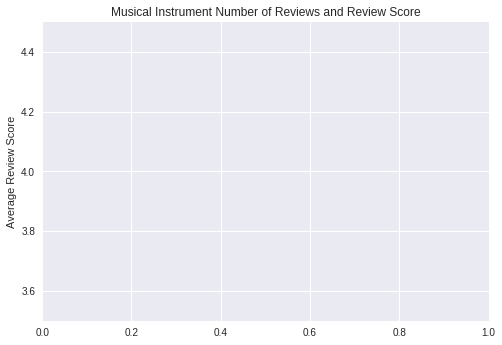

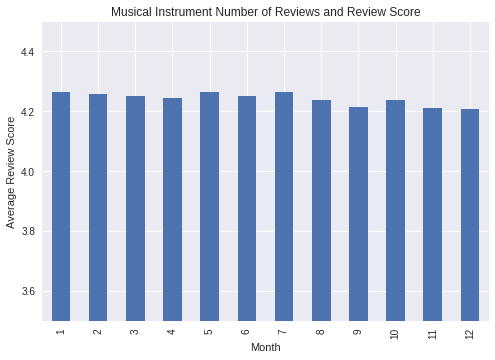

In [20]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
plt.ylim(3.5,4.5)
plt.ylabel("Average Review Score")
plt.title("Musical Instrument Number of Reviews and Review Score")
month_avg.plot(ax=ax, kind='bar',legend=None)
plt.xlabel("Month")
plt.show()

In [15]:
years = df[['reviewYear','overall']].groupby(['reviewYear'], as_index=False)
years.count()

,reviewYear,overall
0,1998,28
1,1999,186
2,2000,621
3,2001,947
4,2002,926
5,2003,1122
6,2004,1787
7,2005,3141
8,2006,4884
9,2007,8337


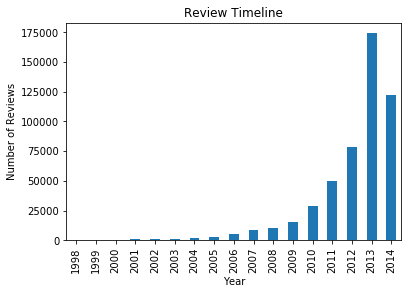

In [18]:
df['reviewYear'].value_counts(sort=False).plot(ax=ax, kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Review Timeline")
plt.show()

In [ ]:
m_df = getDF('/media/wcowart/OS/Amazon Review Dataset/meta_Musical_Instruments.json.gz')
m_df = m_df[['asin','price', 'title', 'description']]

In [ ]:
m_df.set_index('asin', inplace=True)

In [ ]:
m_df.sort_index(inplace=True)

## Data	Preprocessing
There are some issues with the data, first there are products that do not have a siginificant number of reviews.

There is also some missing data.
We have plenty of data, therefore I decided to simply drop any rows with missing data and to remove all products have less than 15 reviews.

In [ ]:
merged = m_df.join(review_counts)
merged = merged[merged['count'] > 15]
merged = merged.dropna()
merged.head(5)

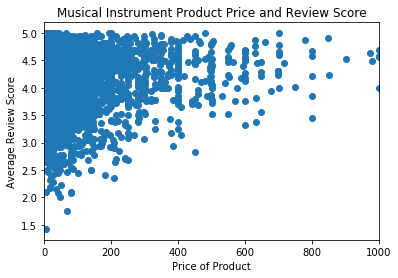

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.xlim(0,merged[('price')].max())
plt.scatter(merged[('price')], merged[('mean')])
plt.xlabel("Price of Product")
plt.ylabel("Average Review Score")
plt.title("Musical Instrument Product Price and Review Score")
plt.show()

In [10]:
price_counts = merged[['price','mean']]
price_counts.groupby(['mean']).describe()

price
mean                      
1.419355 count    1.000000
         mean     5.990000
         std           NaN
         min      5.990000
         25%      5.990000
         50%      5.990000
         75%      5.990000
         max      5.990000
1.750000 count    1.000000
         mean    66.990000
         std           NaN
         min     66.990000
         25%     66.990000
         50%     66.990000
         75%     66.990000
         max     66.990000
2.000000 count    1.000000
         mean    45.990000
         std           NaN
         min     45.990000
         25%     45.990000
         50%     45.990000
         75%     45.990000
         max     45.990000
2.080000 count    2.000000
         mean    59.990000
         std     28.284271
         min     39.990000
         25%     49.990000
         50%     59.990000
...                    ...
4.966667 std    243.251804
         min      4.980000
         25%     90.982500
         50%    176.985000
         75%    262.987500
         max    348.990000
4.970588 count    1.000000
         mean   121.480000
         std           NaN
         min    121.480000
         25%    121.480000
         50%    121.480000
         75%    121.480000
         max    121.480000
4.974359 count    1.000000
         mean   322.000000
         std           NaN
         min    322.000000
         25%    322.000000
         50%    322.000000
         75%    322.000000
         max    322.000000
5.000000 count   20.000000
         mean   112.674000
         std    180.522516
         min      4.730000
         25%     13.737500
         50%     28.980000
         75%    168.000000
         max    699.990000

[14432 rows x 1 columns]

There are a few things we see immediately. In general, the higher the price of a product, the better the average review score. It looks like it's true that you get what you pay for!

Let's also try a few more comparisons to make sure we're not missing anything obvious.

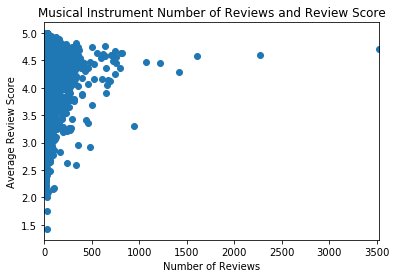

In [34]:
plt.xlim(-1,merged[('count')].max())
plt.scatter(merged[('count')], merged[('mean')])
plt.xlabel("Number of Reviews")
plt.ylabel("Average Review Score")
plt.title("Musical Instrument Number of Reviews and Review Score")
plt.show()

In [4]:
from pandas import to_datetime
import scipy as sp

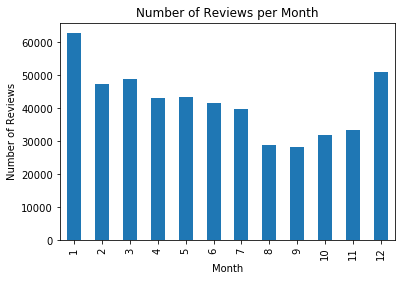

In [36]:
fig, ax = plt.subplots()
df['reviewMonth'].value_counts(sort=False).plot(ax=ax, kind='bar')
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews per Month")
plt.show()

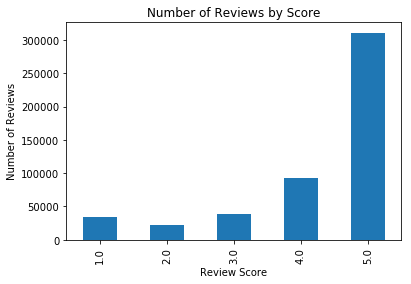

In [37]:
fig, ax = plt.subplots()
df.overall.value_counts(sort=False).sort_index().plot(ax=ax, kind='bar')
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews by Score")
plt.show()

In [44]:
df.overall.value_counts(sort=False).sort_index()

1.0     34931
2.0     22618
3.0     38537
4.0     93306
5.0    310784
Name: overall, dtype: int64

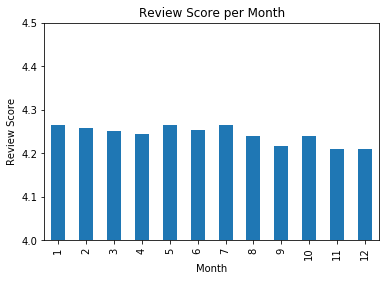

In [50]:
month_avg.plot(kind='bar', legend=None)
plt.xlabel("Month")
plt.ylabel("Review Score")
plt.title("Review Score per Month")
plt.ylim(4.0,4.5)
plt.show()

It also appears that the more reviews a product has, the higher the review score. This will be extremely useful in our models later.

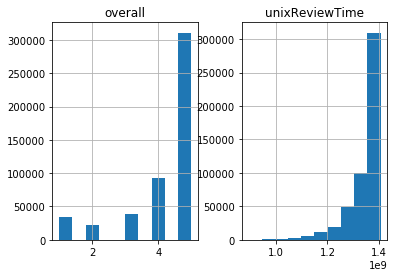

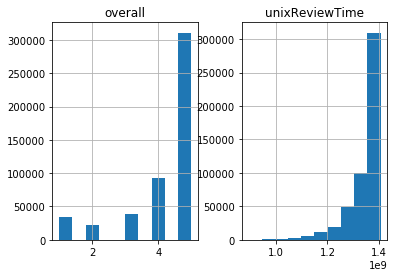

In [6]:
import matplotlib.pyplot as plt
import numpy as np
df.hist()
plt.show()

Let's see if we can perform some more in depth analysis using more product traits.

Next, let's see if there's something that the pictures can tell us about the review score.

Let's look at the product description text and see if this can inform customer scoring.

Let's try looking at the review text itself and see if this can inform anything about the score the customer gives.

First, we'll see if there is anything the length of the review can tell us.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, learning_curve, ShuffleSplit
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
plt.style.use('ggplot')

In [22]:
reviews = df[['summary', 'unixReviewTime', 'reviewText', 'reviewTime', 'helpful', 'overall', 'asin']].dropna()
reviews = reviews.head(5000) #use small portion to test models
reviews['text_length'] = reviews['reviewText'].map(lambda text: len(text))

In [23]:
reviews['text_length'].describe()

count     5000.000000
mean       883.218200
std       1089.182139
min          8.000000
25%        234.000000
50%        516.000000
75%       1062.000000
max      21851.000000
Name: text_length, dtype: float64

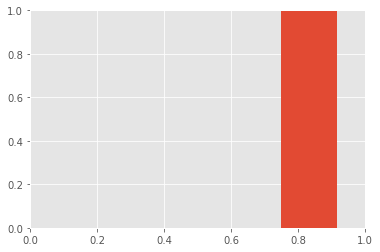

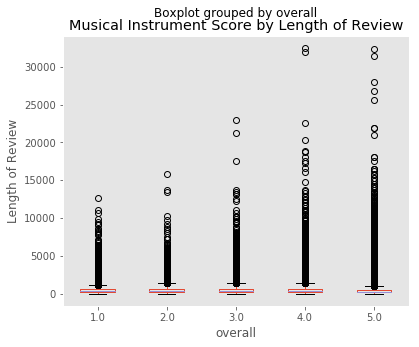

In [19]:
reviews.boxplot(column='text_length', by='overall', grid=False, figsize=(6,5));
plt.title("Musical Instrument Score by Length of Review")
plt.ylabel("Length of Review")
plt.show()

So, in general, the longer a review the better the score will be. We could incorporate this into a model as well.

In [24]:
helpfuldf = reviews['helpful'].apply(pd.Series)

In [25]:
reviews['overall_helpfulness'] = helpfuldf[0] - helpfuldf[1]

In [26]:
reviews['overall_helpfulness'].describe()

count    5000.000000
mean       -3.662400
std        12.608831
min      -201.000000
25%        -3.000000
50%         0.000000
75%         0.000000
max         0.000000
Name: overall_helpfulness, dtype: float64

In [27]:
reviews['overall_helpfulness'].max()

0

In [126]:
reviews.describe()

,unixReviewTime,overall,text_length,overall_helpfulness
count,2.000000e+03,2000.00000,2000.000000,2000.000000
mean,1.219583e+09,4.40850,1020.582000,-7.958500
std,1.058422e+08,1.13942,1323.287205,18.965775
min,9.185184e+08,1.00000,11.000000,-201.000000
25%,1.142899e+09,4.00000,226.000000,-7.000000
50%,1.165061e+09,5.00000,561.500000,-3.000000
75%,1.335550e+09,5.00000,1260.500000,0.000000
max,1.404950e+09,5.00000,21851.000000,0.000000


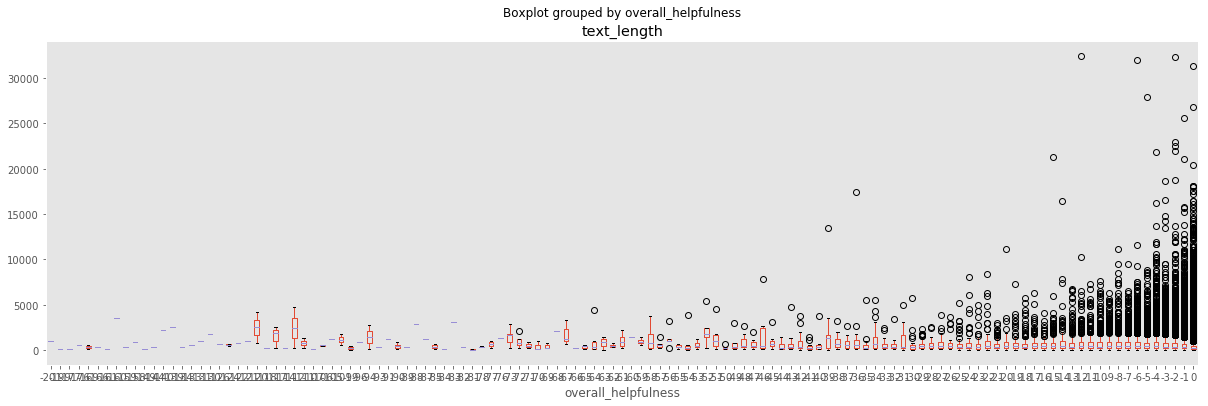

In [25]:
reviews.boxplot(column='text_length', by='overall_helpfulness', grid=False, figsize=(20,6));
plt.show()

In general, the longer a review is, the less unhelpful it is (after 10000 characters).
(No reviews in this category were ranked as "helpful" overall.)

Let's look more in depth at the text of a review and see if we can determine if the review will be positive of negative.

In [28]:
reviews['class'] = reviews.overall.map (lambda x: 'high' if (x > 3) else 'low')

In [16]:
reviews.describe()

,unixReviewTime,overall,text_length,overall_helpfulness
count,2.000000e+03,2000.00000,2000.000000,2000.000000
mean,1.219583e+09,4.40850,1020.582000,-7.958500
std,1.058422e+08,1.13942,1323.287205,18.965775
min,9.185184e+08,1.00000,11.000000,-201.000000
25%,1.142899e+09,4.00000,226.000000,-7.000000
50%,1.165061e+09,5.00000,561.500000,-3.000000
75%,1.335550e+09,5.00000,1260.500000,0.000000
max,1.404950e+09,5.00000,21851.000000,0.000000


# Classifying documents

In [29]:
# Define a count vectorizer
count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(reviews['reviewText'].values)

# Define a tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidfs = tfidf_vectorizer.fit_transform(reviews['reviewText'].values)

for x in counts[0].toarray().tolist():
    x

X = tfidfs
y = reviews['class'].values

## Synthetic Minority Oversampling Technique (SMOTE)

or how I ran out of memory

In [30]:
X = X.toarray()

In [158]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import seaborn as sns
sns.set()
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply regular SMOTE
sm = SMOTE(kind='regular')
X_resampled, y_resampled = sm.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

X_resample = X_resampled
X_resampled = pd.DataFrame(X_resampled)


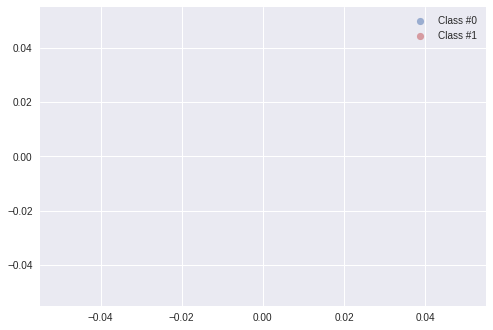

In [167]:
def plotClassificationData(x, y, title=""):
    palette = sns.color_palette()
    plt.scatter(x[y == 0, 0], x[y == 0, 1], label="Class #0", alpha=0.5,
                facecolor=palette[0], linewidth=0.15)
    plt.scatter(x[y == 1, 0], x[y == 1, 1], label="Class #1", alpha=0.5,
                facecolor=palette[2], linewidth=0.15)
    plt.title(title)
    plt.legend()
    plt.show()
xv = pca.fit_transform(X)
plotClassificationData(xv,y)

In [ ]:
len(X_resampled)

Looks like we ran out memory converting a large sparse matrix to a dense array. Let's try something else...

In [66]:
#reviewSample = reviews.head(2000) #use small portion to test models

In [67]:
## Define a count vectorizer
#count_vectorizer = CountVectorizer()
#countsSample = count_vectorizer.fit_transform(reviewSample['reviewText'].values)

## Define a tfidf vectorizer
#tfidf_vectorizer = TfidfVectorizer()
#tfidfsSample = tfidf_vectorizer.fit_transform(reviewSample['reviewText'].values)

#for xrs in counts[0].toarray().tolist():
#    xrs

In [68]:
#Xrs = tfidfsSample
#yrs = reviewSample['class'].values

##Just a quick test..
#classifier = MultinomialNB()
#classifier.fit(Xrs, yrs)

#example_counts = tfidf_vectorizer.transform(df.tail().reviewText)
#predictions = classifier.predict(example_counts)
#for prediction in predictions:
#   print(prediction)
#df.tail().overall.map (lambda x: 'high' if (x > 3) else 'low')

high
high
high
high
high


500171    high
500172    high
500173    high
500174    high
500175    high
Name: overall, dtype: object

In [69]:
#XMrs = Xrs.toarray()

In [80]:
#from imblearn.over_sampling import SMOTE
#from sklearn.decomposition import PCA
#from sklearn.decomposition import TruncatedSVD
## Instanciate a PCA object for the sake of easy visualisation
#pca = PCA(n_components=2)
#svd = TruncatedSVD(n_components=2)
## Fit and transform x to visualise inside a 2D feature space
#X_vis = pca.fit_transform(XMrs)

## Apply regular SMOTE
#sm = SMOTE(kind='regular')
#X_resampled, y_resampled = sm.fit_sample(XMrs, yrs)
#X_res_vis = pca.transform(X_resampled)

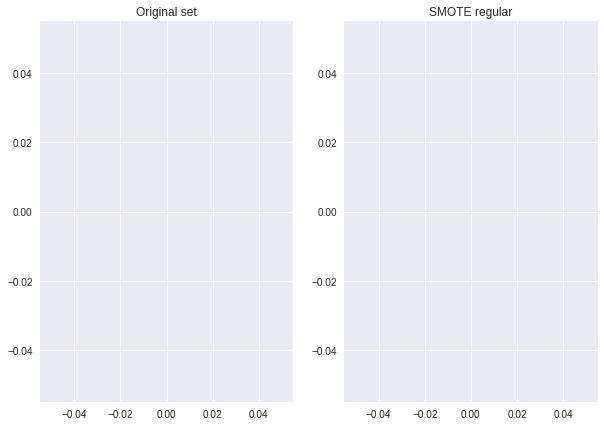

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Define some color for the plotting
almost_black = '#262626'
palette = sns.color_palette()

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))

ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5, edgecolor=almost_black,
            facecolor=palette[0], linewidth=0.15)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5, edgecolor=almost_black,
            facecolor=palette[2], linewidth=0.15)
ax2.set_title('SMOTE regular')

plt.show()

In [33]:


#Just a quick test..
classifier = MultinomialNB()
classifier.fit(X_resampled, y_resampled)


example_counts = tfidf_vectorizer.transform(df.tail().reviewText)
predictions = classifier.predict(example_counts)
for prediction in predictions:
    print(prediction)
df.tail().overall.map (lambda x: 'high' if (x > 3) else 'low')

low
high
low
high
low


500171    high
500172    high
500173    high
500174    high
500175    high
Name: overall, dtype: object

In [328]:

X1 = counts
y1 = reviews['class'].values

X1 = X1.toarray()
X_vis = pca.fit_transform(X1)

# Apply regular SMOTE
sm = SMOTE(kind='regular')
X1_resampled, y1_resampled = sm.fit_sample(X1, y1)
X1_res_vis = pca.transform(X1_resampled)

#X1_resampled = pd.DataFrame(X1_resampled)


In [138]:
#pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

class DenseTransformer:

    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [34]:
from sklearn import tree
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
label_encoder = preprocessing.LabelEncoder()

pipeline = Pipeline([
    ('vectorizer',  CountVectorizer()),
    ('classifier',  MultinomialNB()) ])

pipeline.fit(reviews['reviewText'].values, reviews['class'].values)
pipeline.predict(df.tail().reviewText)

pipeline1 = Pipeline([
    ('vectorizer',  CountVectorizer()),
    ('classifier',  RandomForestClassifier()) ])

pipeline1.fit(reviews['reviewText'].values, reviews['class'].values)
pipeline1.predict(df.tail().reviewText)

pca = PCA()
knn = KNN()
#pipeline2 = Pipeline([('vectorizer',  CountVectorizer()), ('densify', DenseTransformer), ('sm', sm),])
#pipeline2.fit(reviews['reviewText'].values, reviews['class'].values)
#pipeline2.predict(df.tail().reviewText)


#could not get pipelines to play nice with .toarray/.todense and SMOTE
#pca = PCA()
#knn = KNN()   
#pipeline = make_pipeline(CountVectorizer(), DenseTransformer, sm, classifier)

#pipeline.fit(reviews['reviewText'].values, reviews['class'].values)
#pipeline.predict(df.tail().reviewText)

/home/wcowart/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
tdf = df.head(500)
rdf = df.tail(500)

Ok, looks like we're back on the right path using a smaller set and SMOTEing on that.

# Cross Validation

In [35]:
k_fold = KFold(n_splits=5)
scores = []
y_true = []
y_pred = []
probas = []
confusion = np.array([[0, 0], [0, 0]])
confusion1 = np.array([[0, 0], [0, 0]])
scores1 = []
y_pred1 = []
probas1 = []

for train_indices, test_indices in k_fold.split(counts):
    train_text = reviews.iloc[train_indices]['reviewText'].values
    train_y = reviews.iloc[train_indices]['class'].values

    test_text = reviews.iloc[test_indices]['reviewText'].values
    test_y = reviews.iloc[test_indices]['class'].values

    pipeline.fit(train_text, train_y)
    predictions = pipeline.predict(test_text)
    prediction_probas = pipeline.predict_proba(test_text)

    confusion += confusion_matrix(test_y, predictions)
    score = accuracy_score(test_y, predictions)
    scores.append(score)
    
    y_true.extend(test_y)
    y_pred.extend(predictions.tolist())
    probas.extend(prediction_probas[:, 1].tolist())
    
    pipeline1.fit(train_text, train_y)
    predictions1 = pipeline1.predict(test_text)
    prediction_probas1 = pipeline1.predict_proba(test_text)

    confusion1 += confusion_matrix(test_y, predictions1)
    score1 = accuracy_score(test_y, predictions1)
    scores1.append(score1)
    
    y_pred1.extend(predictions.tolist())
    probas1.extend(prediction_probas[:, 1].tolist())
    
#    pipeline2.fit(train_text, train_y)
#    predictions2 = pipeline2.predict(test_text)
#    prediction_probas2 = pipeline2.predict_proba(test_text)

#    confusion2 += confusion_matrix(test_y, predictions2)
#    score2 = accuracy_score(test_y, predictions2)
#    scores2.append(score2)
    
#    y_pred2.extend(predictions.tolist())
#    probas2.extend(prediction_probas[:, 1].tolist())
print('MultinomialNB')
print('Total reviews classified:', len(reviews))
print('Accuracy:', sum(scores)/len(scores))
print('Confusion matrix:')
print(confusion)
print(classification_report(y_true, y_pred))

print('RandomForestClassifier')
print('Total reviews classified:', len(reviews))
print('Accuracy:', sum(scores1)/len(scores1))
print('Confusion matrix:')
print(confusion1)
print(classification_report(y_true, y_pred1))

MultinomialNB
Total reviews classified: 5000
Accuracy: 0.8566
Confusion matrix:
[[4243   19]
 [ 698   40]]
             precision    recall  f1-score   support

       high       0.86      1.00      0.92      4262
        low       0.68      0.05      0.10       738

avg / total       0.83      0.86      0.80      5000

RandomForestClassifier
Total reviews classified: 5000
Accuracy: 0.8518
Confusion matrix:
[[4249   13]
 [ 728   10]]
             precision    recall  f1-score   support

       high       0.86      1.00      0.92      4262
        low       0.68      0.05      0.10       738

avg / total       0.83      0.86      0.80      5000



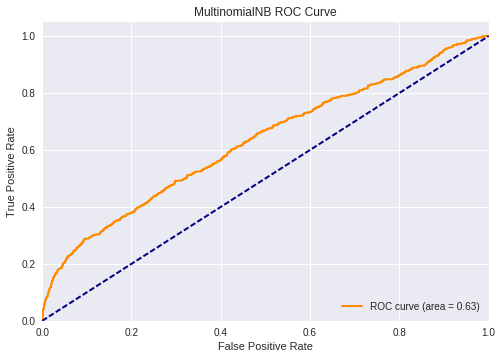

In [36]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_true, probas, pos_label='low')

roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MultinomialNB ROC Curve')
plt.legend(loc="lower right")
plt.show()

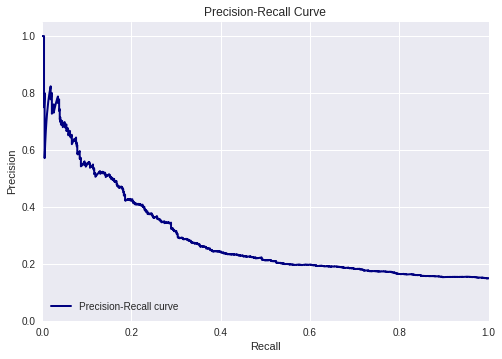

In [37]:
precision, recall, thresholds = precision_recall_curve(y_true, probas, pos_label='low')
plt.clf()
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

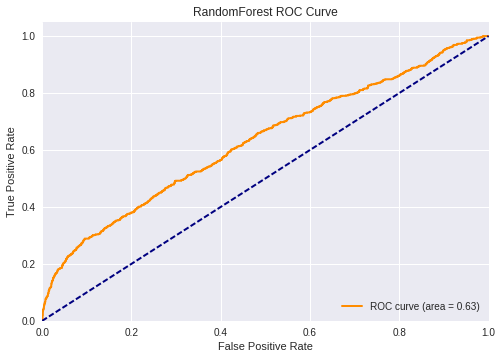

In [38]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_true, probas1, pos_label='low')

roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest ROC Curve')
plt.legend(loc="lower right")
plt.show()

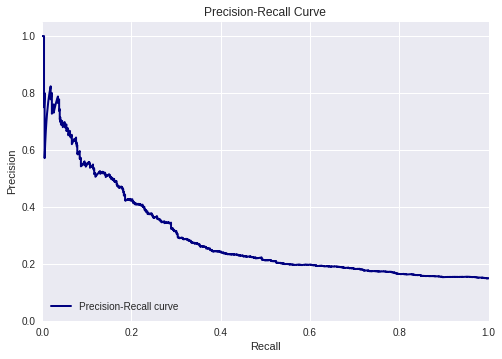

In [39]:
np.seterr(divide='ignore', invalid='ignore')
precision, recall, thresholds = precision_recall_curve(y_true, probas1, pos_label='low')
plt.clf()
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [42]:
rdf['class'] = rdf.overall.map (lambda x: 'high' if (x > 3) else 'low')
tdf['class'] = tdf.overall.map (lambda x: 'high' if (x > 3) else 'low')

/home/wcowart/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/wcowart/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [57]:
from sklearn.preprocessing import label_binarize
clf_MB = MultinomialNB()
clf_MB.fit (X_resampled, y_resampled) #SMOTE data tfidf

example_counts = tfidf_vectorizer.transform(rdf['reviewText'].values)
predictions = clf_MB.predict(example_counts)
probas1 = clf_MB.predict_proba(example_counts)

print('SMOTE and MultinomialNB on a Test Set')
print('Total reviews classified:', len(predictions))

print('Confusion matrix:')
print(confusion_matrix(predictions, rdf['class'].values))
print(classification_report(predictions, rdf['class'].values))

example_counts = tfidf_vectorizer.transform(reviews['reviewText'].values)
predictions = clf_MB.predict(example_counts)
probas = clf_MB.predict_proba(example_counts)
y_true = reviews['class'].values

print('SMOTE and MultinomialNB')
print('Total reviews classified:', len(predictions))

print('Confusion matrix:')
print(confusion_matrix(predictions, y_true))

print(classification_report(predictions, y_true))

SMOTE and MultinomialNB on a Test Set
Total reviews classified: 500
Confusion matrix:
[[247  13]
 [171  69]]
             precision    recall  f1-score   support

       high       0.59      0.95      0.73       260
        low       0.84      0.29      0.43       240

avg / total       0.71      0.63      0.58       500

SMOTE and MultinomialNB
Total reviews classified: 5000
Confusion matrix:
[[3490   14]
 [ 772  724]]
             precision    recall  f1-score   support

       high       0.82      1.00      0.90      3504
        low       0.98      0.48      0.65      1496

avg / total       0.87      0.84      0.82      5000



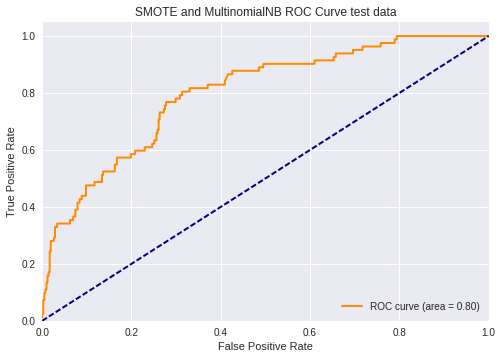

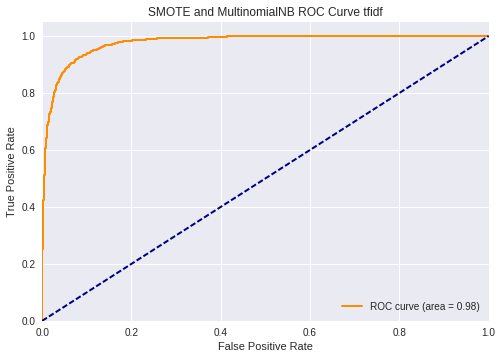

In [64]:
# Compute ROC curve and ROC area for each class

fpr, tpr, _ = roc_curve(rdf['class'].values, probas1[:,-1], pos_label='low')

roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE and MultinomialNB ROC Curve test data')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, _ = roc_curve(y_true, probas[:,-1], pos_label='low')

roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE and MultinomialNB ROC Curve tfidf')
plt.legend(loc="lower right")
plt.show()

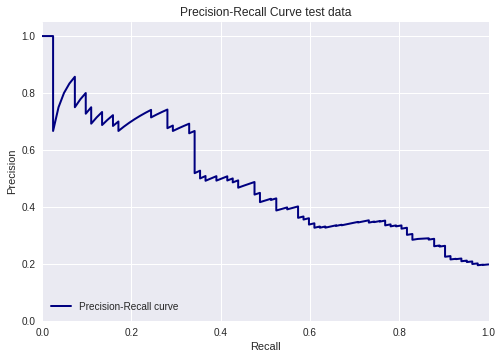

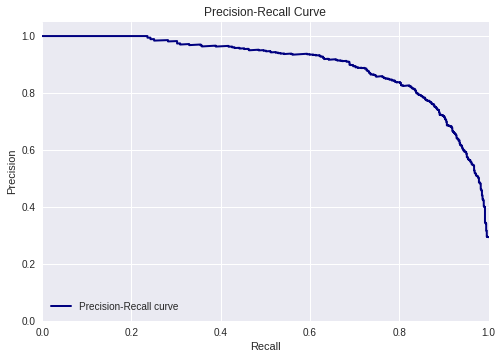

In [65]:
np.seterr(divide='ignore', invalid='ignore')
precision, recall, thresholds = precision_recall_curve(rdf['class'].values, probas1[:,-1], pos_label='low')
plt.clf()
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve test data')
plt.legend(loc="lower left")
plt.show()

np.seterr(divide='ignore', invalid='ignore')
precision, recall, thresholds = precision_recall_curve(y_true, probas[:,-1], pos_label='low')
plt.clf()
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [51]:
clf_RF = RandomForestClassifier()
clf_RF.fit (X_resampled, y_resampled) #SMOTE data
example_counts = tfidf_vectorizer.transform(reviews['reviewText'].values)
predictions = clf_RF.predict(example_counts)
probas = clf_MB.predict_proba(example_counts)
y_true = reviews['class'].values


print('SMOTE and Random Forest')
print('Total reviews classified:', len(predictions))

print('Confusion matrix:')
print(confusion_matrix(predictions, y_true))
print(classification_report(predictions, y_true))
#Seems too high... Am I doing this correctly?

SMOTE and Random Forest
Total reviews classified: 5000
Confusion matrix:
[[4260   35]
 [   2  703]]
             precision    recall  f1-score   support

       high       1.00      0.99      1.00      4295
        low       0.95      1.00      0.97       705

avg / total       0.99      0.99      0.99      5000



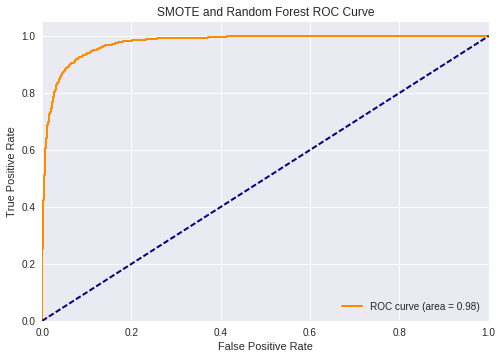

In [48]:
# Compute ROC curve and ROC area for each class

fpr, tpr, _ = roc_curve(y_true, probas[:,-1], pos_label='low')

roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE and Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

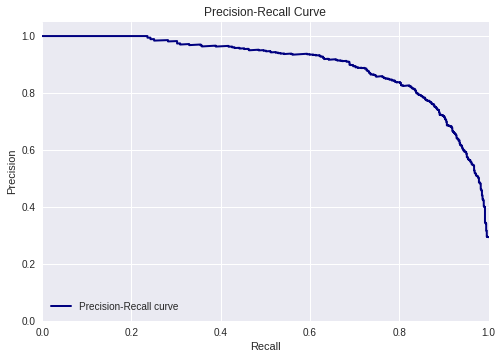

In [49]:
np.seterr(divide='ignore', invalid='ignore')
precision, recall, thresholds = precision_recall_curve(y_true, probas[:,-1], pos_label='low')
plt.clf()
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [72]:
example_counts = tfidf_vectorizer.transform(rdf['reviewText'].values)
predictions = clf_RF.predict(example_counts)
probas=clf_RF.predict_proba(example_counts)
y_true = rdf['class'].values

print('SMOTE and Random Forest on a Test Set')
print('Total reviews classified:', len(predictions))

print('Confusion matrix:')
print(confusion_matrix(predictions, y_true))
print(classification_report(predictions, y_true))

SMOTE and Random Forest on a Test Set
Total reviews classified: 500
Confusion matrix:
[[404  77]
 [ 14   5]]
             precision    recall  f1-score   support

       high       0.97      0.84      0.90       481
        low       0.06      0.26      0.10        19

avg / total       0.93      0.82      0.87       500



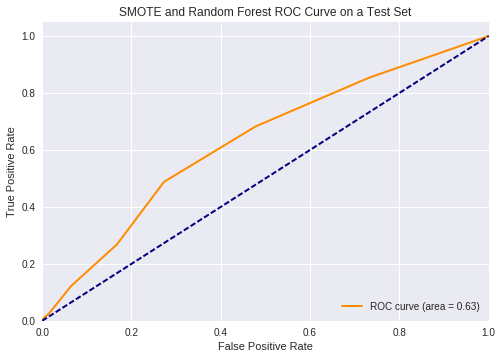

In [73]:
# Compute ROC curve and ROC area for each class

fpr, tpr, _ = roc_curve(y_true, probas[:,-1], pos_label='low')

roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE and Random Forest ROC Curve on a Test Set')
plt.legend(loc="lower right")
plt.show()

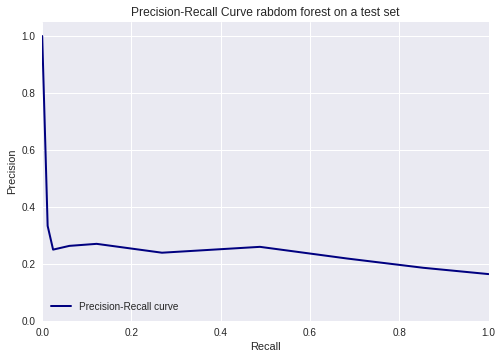

In [75]:
np.seterr(divide='ignore', invalid='ignore')
precision, recall, thresholds = precision_recall_curve(y_true, probas[:,-1], pos_label='low')
plt.clf()
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve rabdom forest on a test set')
plt.legend(loc="lower left")
plt.show()

In [103]:
def model_test(clf, X, y, X_test, y_true):
    clf.fit(X, y)
    example_counts = tfidf_vectorizer.transform(X_test)
    predictions = clf.predict(example_counts)
    probas = clf.predict_proba(example_counts)

    print('Total reviews classified:', len(predictions))

    print('Confusion matrix:')
    print(confusion_matrix(predictions, y_true))
    print(classification_report(predictions, y_true))
    
    # Compute ROC curve and ROC area for each class

    fpr, tpr, _ = roc_curve(y_true, probas[:,-1], pos_label='low')

    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    np.seterr(divide='ignore', invalid='ignore')
    precision, recall, thresholds = precision_recall_curve(y_true, probas[:,-1], pos_label='low')
    plt.clf()
    plt.plot(recall, precision, lw=lw, color='navy', label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

Total reviews classified: 500
Confusion matrix:
[[366  34]
 [ 52  48]]
             precision    recall  f1-score   support

       high       0.88      0.92      0.89       400
        low       0.59      0.48      0.53       100

avg / total       0.82      0.83      0.82       500



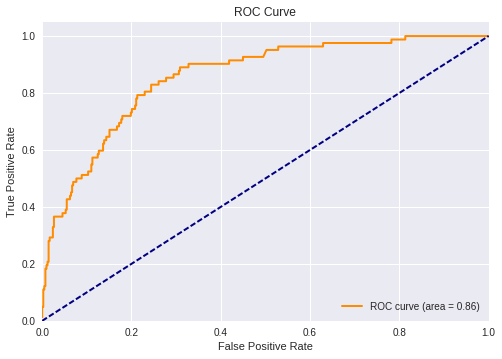

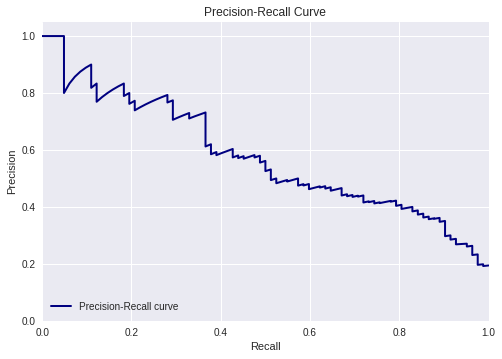

In [104]:
clf = LogisticRegression()
model_test(clf, X_resampled, y_resampled, rdf['reviewText'].values, rdf['class'].values)

In [172]:
tfidfs = tfidf_vectorizer.fit_transform(reviews['reviewText'].values)
X = tfidfs
y = reviews['class'].values

Total reviews classified: 500
Confusion matrix:
[[373  65]
 [ 45  17]]
             precision    recall  f1-score   support

       high       0.89      0.85      0.87       438
        low       0.21      0.27      0.24        62

avg / total       0.81      0.78      0.79       500



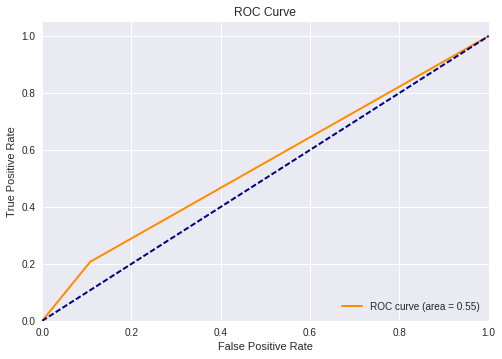

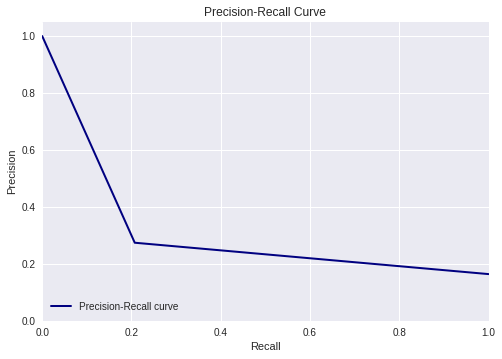

In [173]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
example_counts = tfidf_vectorizer.transform(rdf['reviewText'].values)
example_counts = example_counts.toarray()
predictions = clf.predict(example_counts)
probas = clf.predict_proba(example_counts)
y_true = rdf['class'].values

print('Total reviews classified:', len(predictions))

print('Confusion matrix:')
print(confusion_matrix(predictions, y_true))
print(classification_report(predictions, y_true))
    
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_true, probas[:,-1], pos_label='low')
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2

plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
    
np.seterr(divide='ignore', invalid='ignore')
precision, recall, thresholds = precision_recall_curve(y_true, probas[:,-1], pos_label='low')
plt.clf()
plt.plot(recall, precision, lw=lw, color='navy', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
#model_test(clf, X_resampled, y_resampled, rdf['reviewText'].values, rdf['class'].values)

Total reviews classified: 500
Confusion matrix:
[[249  48]
 [169  34]]
             precision    recall  f1-score   support

       high       0.60      0.84      0.70       297
        low       0.41      0.17      0.24       203

avg / total       0.52      0.57      0.51       500



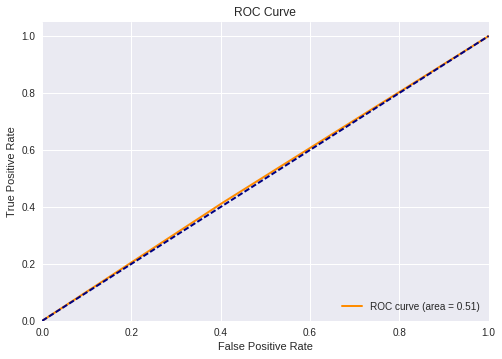

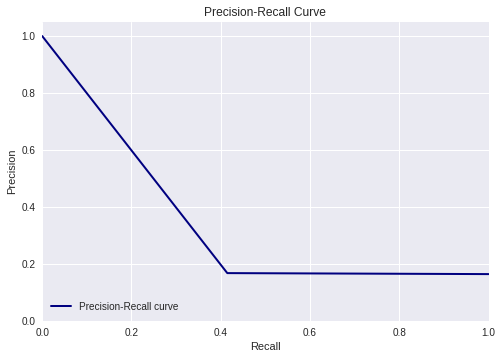

In [175]:
clf = GaussianNB()
clf.fit(X.toarray(), y)
example_counts = tfidf_vectorizer.transform(rdf['reviewText'].values)
example_counts = example_counts.toarray()
predictions = clf.predict(example_counts)
probas = clf.predict_proba(example_counts)
y_true = rdf['class'].values

print('Total reviews classified:', len(predictions))

print('Confusion matrix:')
print(confusion_matrix(predictions, y_true))
print(classification_report(predictions, y_true))
    
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_true, probas[:,-1], pos_label='low')
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2

plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
    
np.seterr(divide='ignore', invalid='ignore')
precision, recall, thresholds = precision_recall_curve(y_true, probas[:,-1], pos_label='low')
plt.clf()
plt.plot(recall, precision, lw=lw, color='navy', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
#model_test(clf, X_resampled, y_resampled, rdf['reviewText'].values, rdf['class'].values)

Total reviews classified: 500
Confusion matrix:
[[360  52]
 [ 58  30]]
             precision    recall  f1-score   support

       high       0.86      0.87      0.87       412
        low       0.37      0.34      0.35        88

avg / total       0.77      0.78      0.78       500



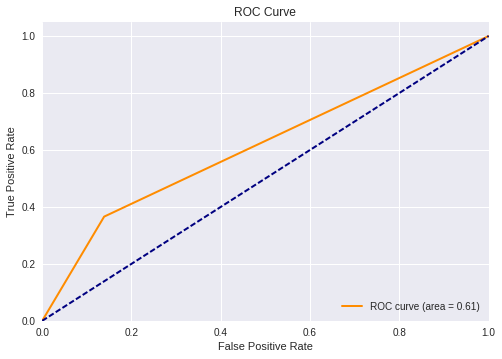

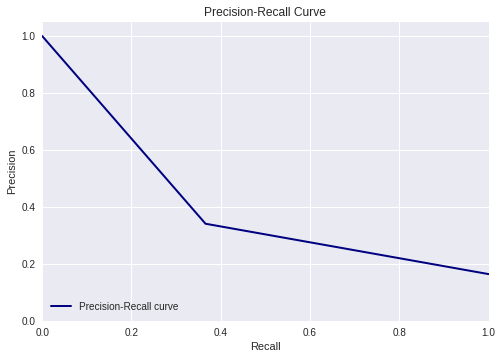

In [108]:
clf = tree.DecisionTreeClassifier()
model_test(clf, X_resampled, y_resampled, rdf['reviewText'].values, rdf['class'].values)

In [321]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

CPU times: user 2.47 s, sys: 328 ms, total: 2.8 s
Wall time: 3.65 s


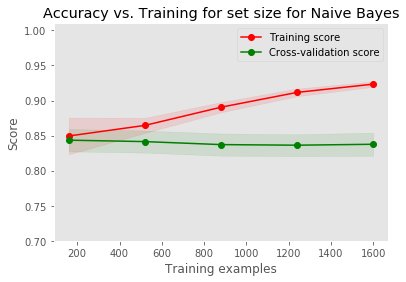

In [85]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
%time plot_learning_curve(MultinomialNB(), "Accuracy vs. Training for set size for Naive Bayes", counts, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4);
plt.show()

CPU times: user 2.78 s, sys: 680 ms, total: 3.46 s
Wall time: 29.7 s


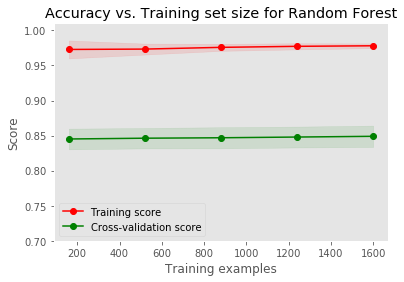

In [131]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
%time plot_learning_curve(RandomForestClassifier(), "Accuracy vs. Training set size for Random Forest", counts, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4);
plt.show()

CPU times: user 5min 26s, sys: 1.96 s, total: 5min 27s
Wall time: 7min 33s


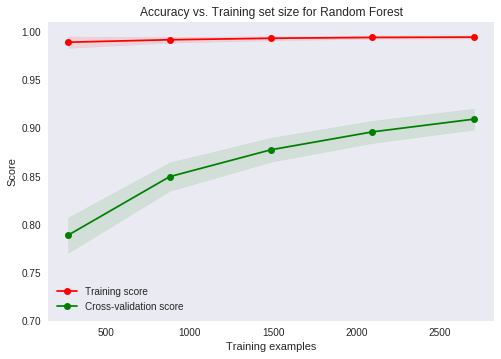

In [324]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
%time plot_learning_curve(RandomForestClassifier(), "Accuracy vs. Training set size for Random Forest", X_resampled, y_resampled, ylim=(0.7, 1.01), cv=cv, n_jobs=4);
plt.show()

In [34]:
df['class'] = df.overall.map (lambda x: 'high' if (x > 3) else 'low')

# Feature Selection

In [404]:
from sklearn.feature_selection import SelectKBest, f_regression
count_vectorizer = CountVectorizer(stop_words='english')
X = count_vectorizer.fit_transform(reviews['reviewText'].values)
y= reviews['class'].values


# Apply regular SMOTE
Xsm_resampled, ysm_resampled = sm.fit_sample(X.toarray(), y)

#X1_resampled = pd.DataFrame(X1_resampled)
kbest = SelectKBest(k=50)
kbest.fit(Xsm_resampled, ysm_resampled)
important = kbest.get_support(True)

In [407]:
from sklearn import tree
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
label_encoder = preprocessing.LabelEncoder()

clf = LogisticRegression()
clf.fit(Xsm_resampled[:, important], ysm_resampled)
clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(Xsm_resampled[:, important], ysm_resampled)
clf2 = RandomForestClassifier(random_state=1)
clf2.fit(Xsm_resampled[:, important], ysm_resampled)
clf3 = GaussianNB()
clf3.fit(Xsm_resampled[:, important], ysm_resampled)
clf4 = tree.DecisionTreeClassifier()
clf4 = clf4.fit(Xsm_resampled, ysm_resampled)

In [408]:
for c, i in sorted(zip(clf.coef_[0], important.tolist()), reverse=True):
     print ("% 20s  | coef: %.2f" % (count_vectorizer.get_feature_names()[i], c))

                youd  | coef: 3.87
              emails  | coef: 2.77
              boring  | coef: 2.67
              remove  | coef: 2.64
            terrible  | coef: 2.57
             minutes  | coef: 2.25
                hype  | coef: 1.69
                 bad  | coef: 1.40
               money  | coef: 1.04
                jake  | coef: 0.28
               ennis  | coef: 0.27
           brokeback  | coef: 0.23
               story  | coef: 0.10
                love  | coef: 0.08
               heath  | coef: 0.07
                film  | coef: 0.04
               years  | coef: 0.02
                time  | coef: -0.01
              ledger  | coef: -0.01
                true  | coef: -0.04
                 lee  | coef: -0.12
                jack  | coef: -0.16
           emotional  | coef: -0.21
                life  | coef: -0.25
                 man  | coef: -0.25
                 ang  | coef: -0.27
                work  | coef: -0.28
            mountain  | coef: -0.30
         

In [400]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y)
print("Logisitc Regression score | %s" % (scores.mean()))
scores = cross_val_score(clf1, X, y)
print("KNN score | %s" % (scores.mean()))
scores = cross_val_score(clf2, X, y)
print("Random Forest score | %s" % (scores.mean()))
scores = cross_val_score(clf3, X.toarray(), y)
print("Naive Bayes | %s" % (scores.mean()))
scores = cross_val_score(clf4, X, y)
print("Decision Tree score | %s" % (scores.mean()))

Logisitc Regression score | 0.845499922711
KNN score | 0.808012660336
Random Forest score | 0.848501424963
Naive Bayes | 0.765517391454
Decision Tree score | 0.769999384692


In [402]:
#DO NOT USE SMOTE DATA FOR CROSS VAL!!!!
scores = cross_val_score(clf, Xsm_resampled, ysm_resampled)
print("Logisitc Regression score | %s" % (scores.mean()))
scores = cross_val_score(clf1,  Xsm_resampled, ysm_resampled)
print("KNN score | %s" % (scores.mean()))
scores = cross_val_score(clf2, Xsm_resampled, ysm_resampled)
print("Random Forest score | %s" % (scores.mean()))
scores = cross_val_score(clf3, Xsm_resampled, ysm_resampled)
print("Naive Bayes | %s" % (scores.mean()))
scores = cross_val_score(clf4, Xsm_resampled, ysm_resampled)
print("Decision Tree score | %s" % (scores.mean()))

Logisitc Regression score | 0.88265119736
KNN score | 0.771110208315
Random Forest score | 0.89832940722
Naive Bayes | 0.863724496009
Decision Tree score | 0.849529076335


In [357]:
import pydotplus 
from IPython.display import Image

In [353]:
#Code by Aysen Tatarinov from https://github.com/aysent/random-forest-leaf-visualization
from sklearn.tree import _tree
def leaf_depths(tree, node_id = 0):
    
     '''
     tree.children_left and tree.children_right store ids
     of left and right chidren of a given node
     '''
     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     '''
     If a given node is terminal, 
     both left and right children are set to _tree.TREE_LEAF
     '''
     if left_child == _tree.TREE_LEAF:
         
         '''
         Set depth of terminal nodes to 0
         '''
         depths = np.array([0])

     else:
         
         '''
         Get depths of left and right children and
         increment them by 1
         '''
         left_depths = leaf_depths(tree, left_child) + 1
         right_depths = leaf_depths(tree, right_child) + 1
 
         depths = np.append(left_depths, right_depths)
 
     return depths

def leaf_samples(tree, node_id = 0):
    
     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     if left_child == _tree.TREE_LEAF:
        
         samples = np.array([tree.n_node_samples[node_id]])

     else:
        
         left_samples = leaf_samples(tree, left_child)
         right_samples = leaf_samples(tree, right_child)

         samples = np.append(left_samples, right_samples)

     return samples

def draw_tree(ensemble, tree_id=0):

     plt.figure(figsize=(8,8))
     plt.subplot(211)

     tree = ensemble.estimators_[tree_id].tree_

     depths = leaf_depths(tree)
     plt.hist(depths, histtype='step', color='#9933ff', 
              bins=range(min(depths), max(depths)+1))

     plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)
    
     plt.subplot(212)
    
     samples = leaf_samples(tree)
     plt.hist(samples, histtype='step', color='#3399ff', 
              bins=range(min(samples), max(samples)+1))
    
     plt.xlabel("Number of samples in leaf nodes (tree %s)" % tree_id)
   
     plt.show()

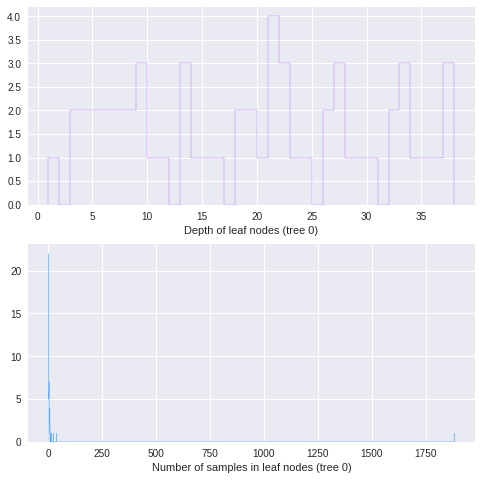

In [358]:
draw_tree(clf2)

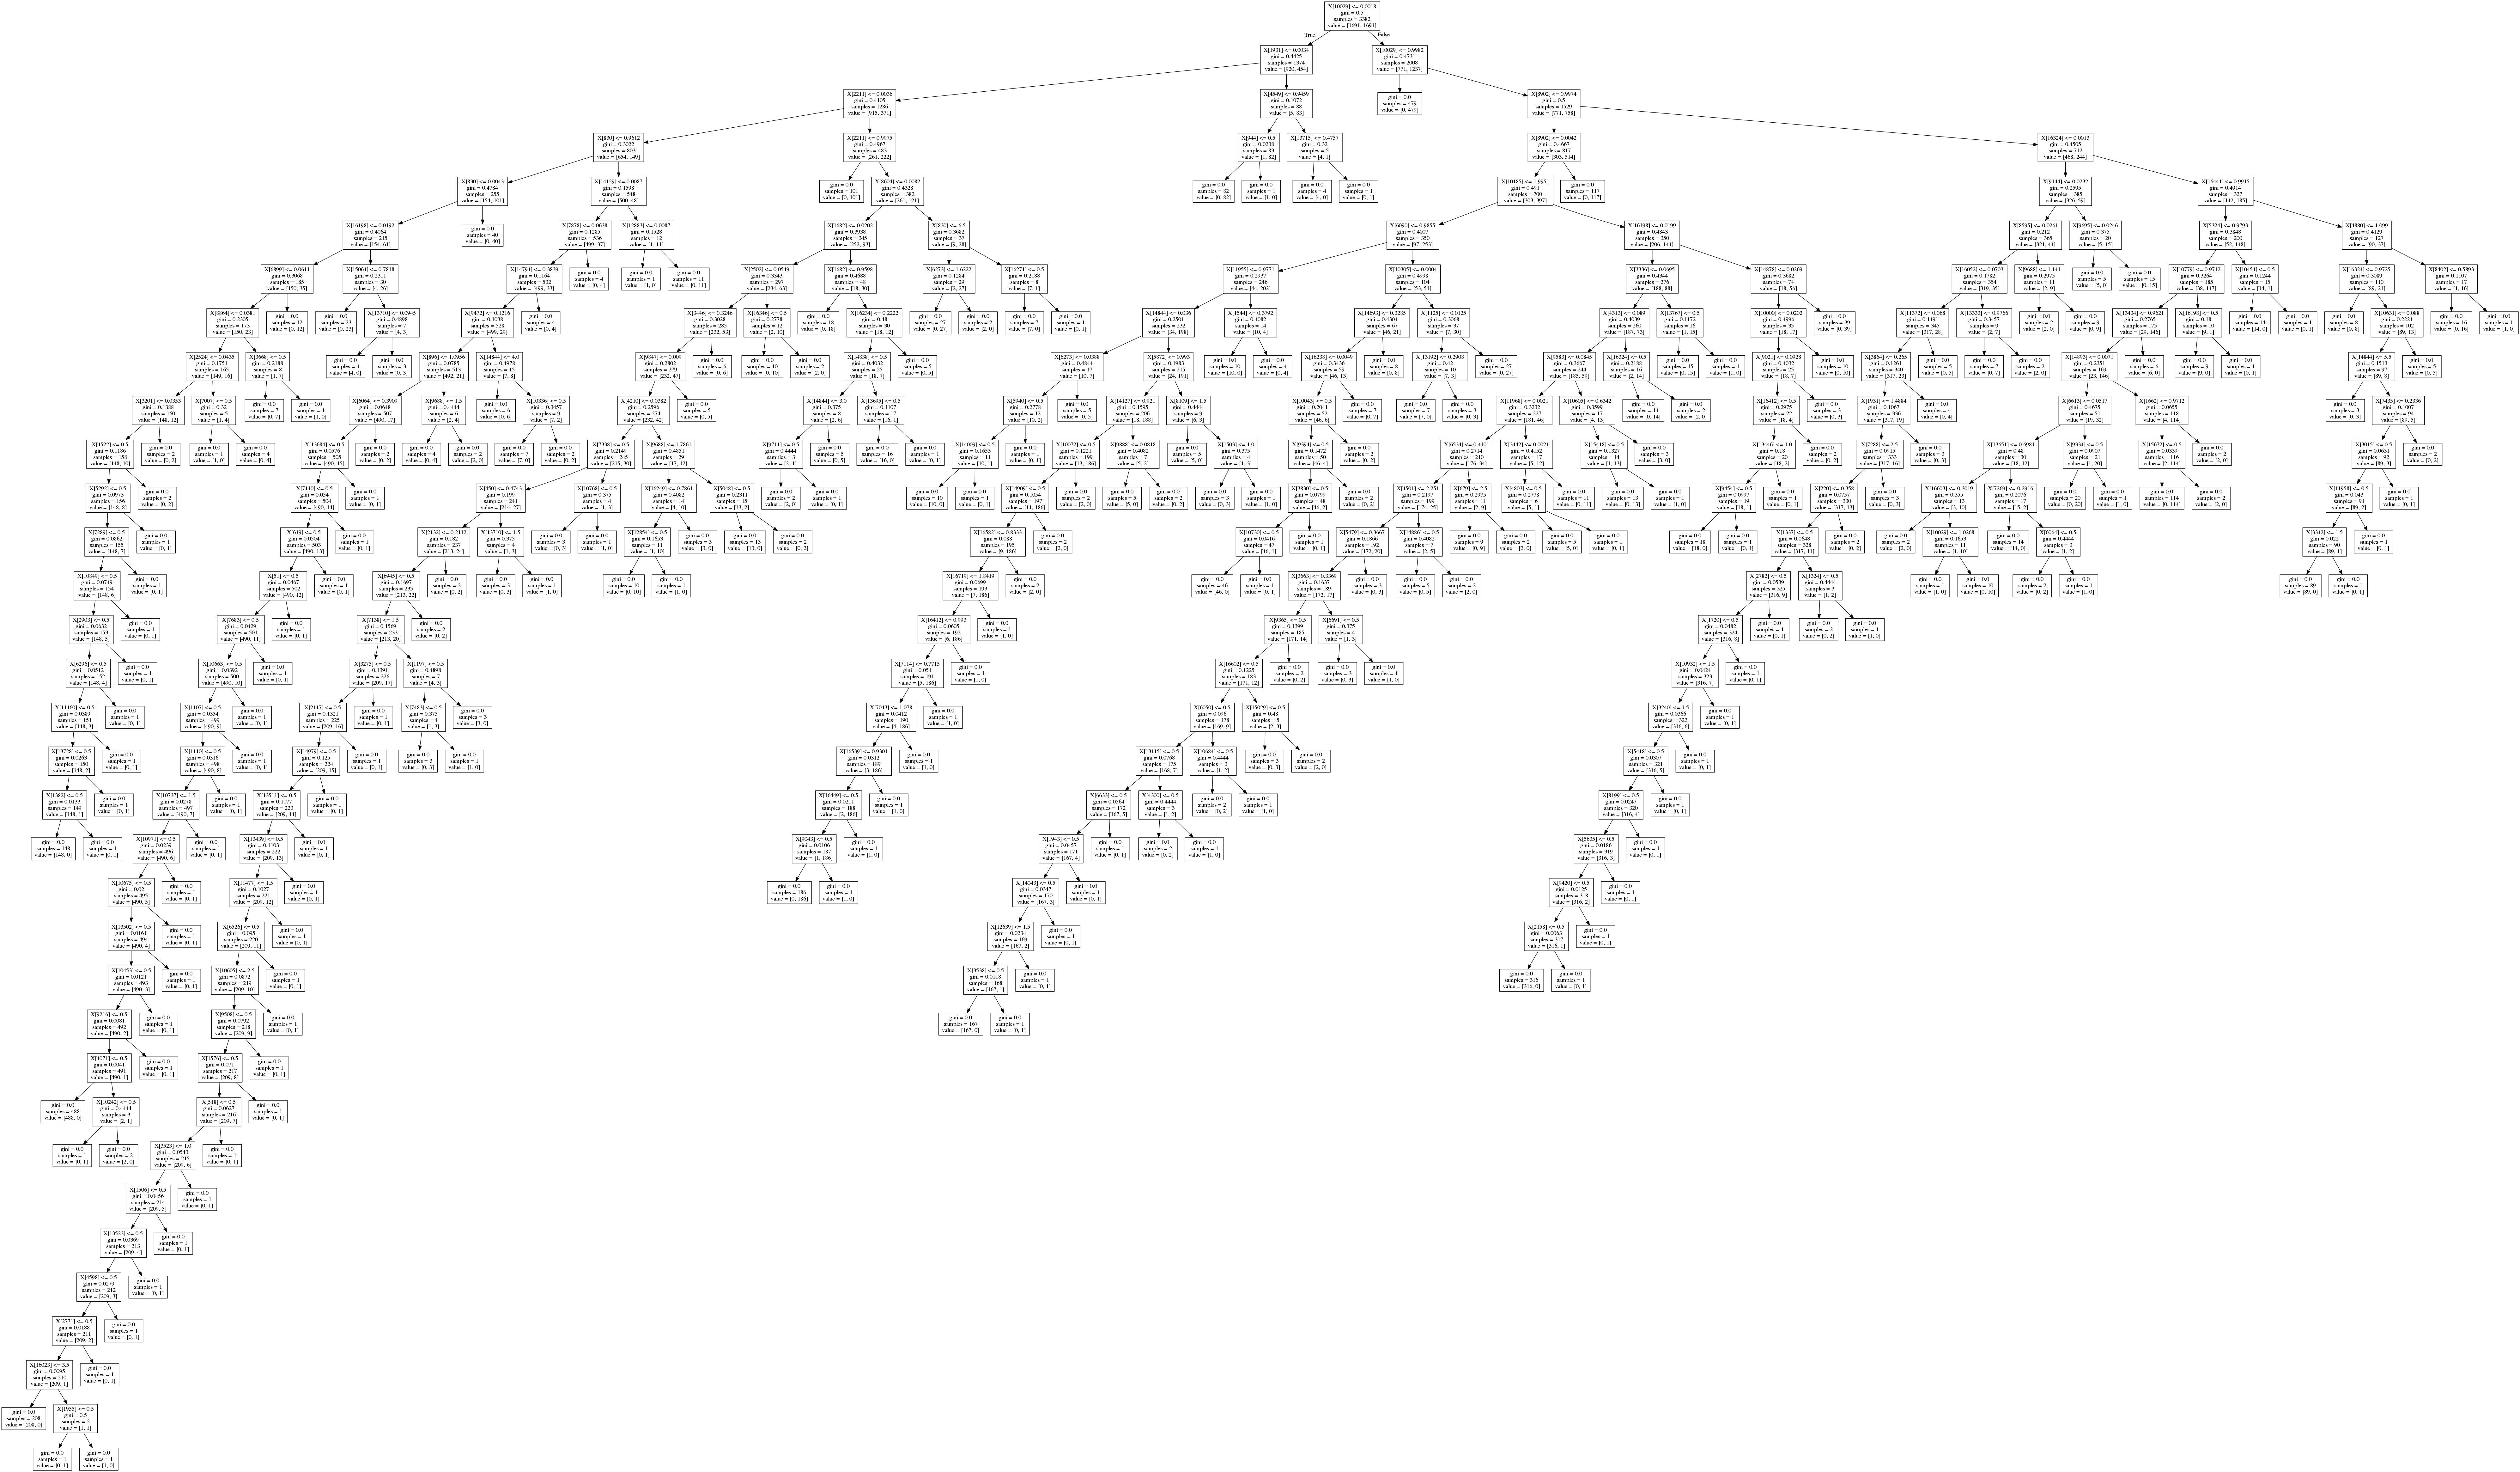

In [373]:
dot_data = tree.export_graphviz(clf4, out_file=None) #feature_names=important.tolist()
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [111]:
# (c) 2014 Reid Johnson
#
# Modified from:
# Kemal Eren (https://github.com/kemaleren/scikit-learn/blob/stacking/sklearn/ensemble/stacking.py)
#
# Generates a stacking/blending of base models. Cross-validation is used to 
# generate predictions from base (level-0) models that are used as input to a 
# combiner (level-1) model.

import numpy as np
#from itertools import zip
from sklearn.model_selection import ParameterGrid
#from sklearn.grid_search import ParameterGrid
from sklearn.base import ClassifierMixin, RegressorMixin
from sklearn.ensemble.base import BaseEnsemble
from sklearn.utils.validation import assert_all_finite

# TODO: Built-in nested cross validation, re-using base classifiers, to pick 
#       best stacking method.
# TODO: Access to best, vote, etc. after training.

__all__ = [
    "Stacking",
    "StackingFWL",
    'estimator_grid'
]


def estimator_grid(*args):
    """Generate candidate estimators from a list of parameter values on the 
    combination of the various parameter lists given.

    Parameters
    ----------
    args : array
        List of classifiers and corresponding parameters.

    Returns
    -------
    result : array
        The generated estimators.
    """
    result = []
    pairs = zip(args[::2], args[1::2])
    for estimator, params in pairs:
        if len(params) == 0:
            result.append(estimator())
        else:
            for p in ParameterGrid(params):
                result.append(estimator(**p))
    return result


class MRLR(ClassifierMixin):
    """Converts a multi-class classification task into a set of indicator 
    regression tasks.

    References
    ----------
    .. [1] K. M. Ting, I. H. Witten, "Issues in Stacked Generalization", 1999.

    """
    def __init__(self, regressor, stackingc, **kwargs):
        self.estimator_ = regressor
        self.estimator_args_ = kwargs
        self.stackingc_ = stackingc

    def _get_subdata(self, X):
        """Returns subsets of the data, one for each class. Assumes the 
        columns of X are striped in order.

        e.g. if n_classes_ == 3, then returns (X[:, 0::3], X[:, 1::3],
        X[:, 2::3])

        Parameters
        ----------
        X : np.ndarray, shape=(n, m)
            The feature data.

        Returns
        -------
        array of shape = [len(set(y)), n_samples]
            The subsets of the data.
        """
        if not self.stackingc_:
            return [X, ] * self.n_classes_

        result = []
        for i in range(self.n_classes_):
            slc = (slice(None), slice(i, None, self.n_classes_))
            result.append(X[slc])
        return result

    def fit(self, X, y):
        """Fit the estimator given predictor(s) X and target y. Assumes the
        columns of X are predictions generated by each predictor on each 
        class. Fits one estimator for each class.

        Parameters
        ----------
        X : np.ndarray, shape=(n, m)
            The feature data for which to compute the predicted output.

        y : array of shape = [n_samples]
            The actual outputs (class data).
        """
        self.n_classes_ = len(set(y))
        self.estimators_ = []

        # Generate feature data subsets corresponding to each class.
        X_subs = self._get_subdata(X)

        # Fit an instance of the estimator to each data subset.
        for i in range(self.n_classes_):
            e = self.estimator_(**self.estimator_args_)
            y_i = np.array(list(j == i for j in y))
            X_i = X_subs[i]
            e.fit(X_i, y_i)
            self.estimators_.append(e)

    def predict(self, X):
        """Predict label values with the fitted estimator on predictor(s) X.

        Returns
        -------
        array of shape = [n_samples]
            The predicted label values of the input samples.
        """
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

    def predict_proba(self, X):
        """Predict label probabilities with the fitted estimator on 
        predictor(s) X.

        Returns
        -------
        proba : array of shape = [n_samples]
            The predicted label probabilities of the input samples.
        """
        proba = []

        X_subs = self._get_subdata(X)

        for i in range(self.n_classes_):
            e = self.estimators_[i]
            X_i = X_subs[i]
            pred = e.predict(X_i).reshape(-1, 1)
            proba.append(pred)
        proba = np.hstack(proba)

        normalizer = proba.sum(axis=1)[:, np.newaxis]
        normalizer[normalizer == 0.0] = 1.0
        proba /= normalizer

        assert_all_finite(proba)

        return proba


class Stacking(BaseEnsemble):
    """Implements stacking/blending.

    Parameters
    ----------
    meta_estimator : string or callable
        May be one of "best", "vote", "average", or any classifier or 
        regressor constructor

    estimators : iterator
        An iterable of estimators; each must support predict_proba()

    cv : iterator
        A cross validation object. Base (level-0) estimators are trained on 
        the training folds, then the meta (level-1) estimator is trained on 
        the testing folds.

    stackingc : bool
        Whether to use StackingC or not. For more information, refer to the 
        following paper:

        Reference:
          A. K. Seewald, "How to Make Stacking Better and Faster While Also 
          Taking Care of an Unknown Weakness," 2002.

    kwargs :
        Arguments passed to instantiate meta_estimator.

    References
    ----------
    .. [1] D. H. Wolpert, "Stacked Generalization", 1992.

    """

    # TODO: Support different features for each estimator.
    # TODO: Support "best", "vote", and "average" for already trained model.
    # TODO: Allow saving of estimators, so they need not be retrained when 
    #       trying new stacking methods.

    def __init__(self, meta_estimator, estimators,
                 cv, stackingc=True, proba=True,
                 **kwargs):
        self.estimators_ = estimators
        self.n_estimators_ = len(estimators)
        self.cv_ = cv
        self.stackingc_ = stackingc
        self.proba_ = proba

        if stackingc:
            if isinstance(meta_estimator, str) or not issubclass(meta_estimator, RegressorMixin):
                raise Exception('StackingC only works with a regressor.')

        if isinstance(meta_estimator, str):
            if meta_estimator not in ('best',
                                      'average',
                                      'vote'):
                raise Exception('Invalid meta estimator: {0}'.format(meta_estimator))
            raise Exception('"{0}" meta estimator not implemented'.format(meta_estimator))
        elif issubclass(meta_estimator, ClassifierMixin):
            self.meta_estimator_ = meta_estimator(**kwargs)
        elif issubclass(meta_estimator, RegressorMixin):
            self.meta_estimator_ = MRLR(meta_estimator, stackingc, **kwargs)
        else:
            raise Exception('Invalid meta estimator: {0}'.format(meta_estimator))

    def _base_estimator_predict(self, e, X):
        """Predict label values with the specified estimator on predictor(s) X.

        Parameters
        ----------
        e : int
            The estimator object.

        X : np.ndarray, shape=(n, m)
            The feature data for which to compute the predicted outputs.

        Returns
        -------
        pred : np.ndarray, shape=(len(X), 1)
            The mean of the label probabilities predicted by the specified 
            estimator for each fold for each instance X.
        """
        # Generate array for the base-level testing set, which is n x n_folds.
        pred = e.predict(X)
        assert_all_finite(pred)
        return pred

    def _base_estimator_predict_proba(self, e, X):
        """Predict label probabilities with the specified estimator on 
        predictor(s) X.

        Parameters
        ----------
        e : int
            The estimator object.

        X : np.ndarray, shape=(n, m)
            The feature data for which to compute the predicted outputs.

        Returns
        -------
        pred : np.ndarray, shape=(len(X), 1)
            The mean of the label probabilities predicted by the specified 
            estimator for each fold for each instance X.
        """
        # Generate array for the base-level testing set, which is n x n_folds.
        pred = e.predict_proba(X)
        assert_all_finite(pred)
        return pred

    def _make_meta(self, X):
        """Make the feature set for the meta (level-1) estimator.

        Parameters
        ----------
        X : np.ndarray, shape=(n, m)
            The feature data.

        Returns
        -------
        An n x len(self.estimators_) array of meta-level features.
        """
        rows = []
        for e in self.estimators_:
            if self.proba_:
                # Predict label probabilities
                pred = self._base_estimator_predict_proba(e, X)
            else:
                # Predict label values
                pred = self._base_estimator_predict(e, X)
            rows.append(pred)
        return np.hstack(rows)

    def fit(self, X, y):
        """Fit the estimator given predictor(s) X and target y.

        Parameters
        ----------
        X : np.ndarray, shape=(n, m)
            The feature data on which to fit.

        y : array of shape = [n_samples]
            The actual outputs (class data).
        """
        # Build meta data.
        X_meta = [] # meta-level features
        y_meta = [] # meta-level labels

        print ('Training and validating the base (level-0) estimator(s)...')
        print()
        for i, (a, b) in enumerate(self.cv_.split(X, y)):
            print ('Fold [%s]' % (i))

            X_a, X_b = X[a], X[b] # training and validation features
            y_a, y_b = y[a], y[b] # training and validation labels

            # Fit each base estimator using the training set for the fold.
            for j, e in enumerate(self.estimators_):
                print ('  Training base (level-0) estimator %d...' % (j)),
                e.fit(X_a, y_a)
                print ('done.')

            proba = self._make_meta(X_b)
            X_meta.append(proba)
            y_meta.append(y_b)
        print

        X_meta = np.vstack(X_meta)
        if y_meta[0].ndim == 1:
            y_meta = np.hstack(y_meta)
        else:
            y_meta = np.vstack(y_meta)

        # Train meta estimator.
        print ('Training meta (level-1) estimator...'),
        self.meta_estimator_.fit(X_meta, y_meta)
        print ('done.')

        # Re-train base estimators on full data.
        for j, e in enumerate(self.estimators_):
            print ('Re-training base (level-0) estimator %d on full data...' % (j)),
            e.fit(X, y)
            print ('done.')

    def predict(self, X):
        """Predict label values with the fitted estimator on predictor(s) X.

        Parameters
        ----------
        X : np.ndarray, shape=(n, m)
            The feature data for which to compute the predicted output.

        Returns
        -------
        array of shape = [n_samples]
            The predicted label values of the input samples.
        """
        X_meta = self._make_meta(X)
        return self.meta_estimator_.predict(X_meta)

    def predict_proba(self, X):
        """Predict label probabilities with the fitted estimator on 
        predictor(s) X.

        Parameters
        ----------
        X : np.ndarray, shape=(n, m)
            The feature data for which to compute the predicted output.

        Returns
        -------
        array of shape = [n_samples]
            The predicted label probabilities of the input samples.
        """
        X_meta = self._make_meta(X)
        return self.meta_estimator_.predict_proba(X_meta)


class StackingFWL(Stacking):
    """Implements Feature-Weighted Linear Stacking.

    References
    ----------
    .. [1] J. Sill, G. Takács, L. Mackey, D. Lin, "Feature-Weighted Linear 
           Stacking", 2009.

    """
    pass

In [119]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold

n_trees = 10

# Generate a list of base (level 0) classifiers.
clfs = [RandomForestClassifier(n_estimators=n_trees, n_jobs=-1, criterion='entropy'),
        ExtraTreesClassifier(n_estimators=n_trees, n_jobs=-1, criterion='entropy'),
        #GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=n_trees)
        ]



# Generate k stratified folds of the training data.
skf = StratifiedKFold(n_splits=5)

stk = Stacking(LogisticRegression, clfs, skf, stackingc=False, proba=True)

In [127]:
stk.fit(X_resampled.values, y_resampled)

Training and validating the base (level-0) estimator(s)...

Fold [0]
  Training base (level-0) estimator 0...
done.
  Training base (level-0) estimator 1...
done.
Fold [1]
  Training base (level-0) estimator 0...
done.
  Training base (level-0) estimator 1...
done.
Fold [2]
  Training base (level-0) estimator 0...
done.
  Training base (level-0) estimator 1...
done.
Fold [3]
  Training base (level-0) estimator 0...
done.
  Training base (level-0) estimator 1...
done.
Fold [4]
  Training base (level-0) estimator 0...
done.
  Training base (level-0) estimator 1...
done.
Training meta (level-1) estimator...
done.
Re-training base (level-0) estimator 0 on full data...
done.
Re-training base (level-0) estimator 1 on full data...
done.


In [129]:
from sklearn import metrics

### Generate predictions with stacked/blended (level-1) classifier. ###
X_test = tfidf_vectorizer.transform(rdf['reviewText'].values)
y_test = rdf['class'].values
score = metrics.accuracy_score(y_test, stk.predict(X_test))
print()
print( 'Blended Classifier Accuracy = %s' % (score))
print()

### Generate predictions with base (level-0) classifiers. ###

# Random forest predictions.
score0 = metrics.accuracy_score(y_test, stk._base_estimator_predict(stk.estimators_[0], X_test))
print( 'Random Forest (10 trees) Accuracy = %s' % (score0))

# Extra trees predictions.
score1 = metrics.accuracy_score(y_test, stk._base_estimator_predict(stk.estimators_[1], X_test))
print( 'Extra Trees (10 trees) Accuracy = %s' % (score1))




Blended Classifier Accuracy = 0.838

Random Forest (10 trees) Accuracy = 0.83
Extra Trees (10 trees) Accuracy = 0.842


# My project is a success!

I wanted to try some more things after this, such as using other metadata (time of day, month, price of product, number of reviews, and other reviews written and helpfulness of other reviews) to help analyze but a lack of man power means I will get to do this for a future project. The following implementations are vague at best...

## Using Review Summaries

In [106]:
# Define a count vectorizer
count_vectorizer = CountVectorizer()
counts_sum = count_vectorizer.fit_transform(reviews['summary'].values)

# Define a tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidfs_sum = tfidf_vectorizer.fit_transform(reviews['summary'].values)

for x in counts_sum[0].toarray().tolist():
    x

from sklearn.feature_selection import SelectKBest, f_regression
count_vectorizer = CountVectorizer(stop_words='english')
X = count_vectorizer.fit_transform(reviews['summary'].values)
y = reviews['summary'].values
kbest = SelectKBest(k=50)
kbest.fit(X, y)
important = kbest.get_support(True)

In [107]:
X = tfidfs_sum
y = reviews['class'].values

classifier = MultinomialNB()
classifier.fit(X, y)


example_counts_summary = tfidf_vectorizer.transform(df.tail().summary)
predictions = classifier.predict(example_counts_summary)
for prediction in predictions:
    print(prediction)


pipeline = Pipeline([
    ('vectorizer',  CountVectorizer()),
    ('classifier',  MultinomialNB()) ])

pipeline.fit(reviews['summary'].values, reviews['class'].values)
pipeline.predict(df.tail().summary)

pipeline1 = Pipeline([
    ('vectorizer',  CountVectorizer()),
    ('classifier',  RandomForestClassifier()) ])
pipeline1.fit(reviews['summary'].values, reviews['class'].values)
pipeline1.predict(df.tail().summary)

high
high
high
high
high


array(['high', 'high', 'high', 'high', 'high'], dtype=object)

In [98]:
pipeline = Pipeline([
    ('vectorizer',  CountVectorizer()),
    ('classifier',  MultinomialNB()) ])

pipeline.fit(reviews['summary'].values, reviews['class'].values)
pipeline.predict(df.tail().summary)

pipeline1 = Pipeline([
    ('vectorizer',  CountVectorizer()),
    ('classifier',  RandomForestClassifier()) ])
pipeline1.fit(reviews['summary'].values, reviews['class'].values)
pipeline1.predict(df.tail().summary)


array(['high', 'high', 'high', 'high', 'high'], dtype=object)

In [139]:
k_fold = KFold(n_splits=5)
scores = []
y_true = []
y_pred = []
probas = []
confusion = np.array([[0, 0], [0, 0]])
confusion1 = np.array([[0, 0], [0, 0]])
scores1 = []
y_pred1 = []
probas1 = []

for train_indices, test_indices in k_fold.split(counts):
    train_text = reviews.iloc[train_indices]['summary'].values
    train_y = reviews.iloc[train_indices]['class'].values

    test_text = reviews.iloc[test_indices]['summary'].values
    test_y = reviews.iloc[test_indices]['class'].values

    pipeline.fit(train_text, train_y)
    predictions = pipeline.predict(test_text)
    prediction_probas = pipeline.predict_proba(test_text)

    confusion += confusion_matrix(test_y, predictions)
    score = accuracy_score(test_y, predictions)
    scores.append(score)
    
    y_true.extend(test_y)
    y_pred.extend(predictions.tolist())
    probas.extend(prediction_probas[:, 1].tolist())
    
    pipeline1.fit(train_text, train_y)
    predictions1 = pipeline1.predict(test_text)
    prediction_probas1 = pipeline1.predict_proba(test_text)

    confusion1 += confusion_matrix(test_y, predictions1)
    score1 = accuracy_score(test_y, predictions1)
    scores1.append(score1)
    
    y_pred1.extend(predictions.tolist())
    probas1.extend(prediction_probas[:, 1].tolist())

print('MultinomialNB')
print('Total reviews classified:', len(reviews))
print('Accuracy:', sum(scores)/len(scores))
print('Confusion matrix:')
print(confusion)
print(classification_report(y_true, y_pred))

print('RandomForestClassifier')
print('Total reviews classified:', len(reviews))
print('Accuracy:', sum(scores1)/len(scores1))
print('Confusion matrix:')
print(confusion1)
print(classification_report(y_true, y_pred1))

MultinomialNB
Total reviews classified: 2000
Accuracy: 0.852
Confusion matrix:
[[1667   24]
 [ 272   37]]
             precision    recall  f1-score   support

       high       0.86      0.99      0.92      1691
        low       0.61      0.12      0.20       309

avg / total       0.82      0.85      0.81      2000

RandomForestClassifier
Total reviews classified: 2000
Accuracy: 0.86
Confusion matrix:
[[1646   45]
 [ 235   74]]
             precision    recall  f1-score   support

       high       0.86      0.99      0.92      1691
        low       0.61      0.12      0.20       309

avg / total       0.82      0.85      0.81      2000



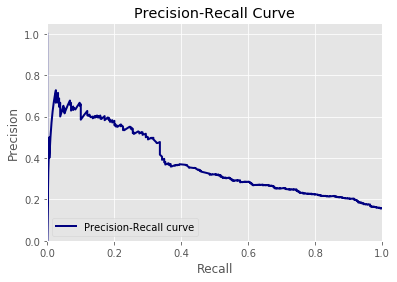

In [144]:
np.seterr(divide='ignore', invalid='ignore')
precision, recall, thresholds = precision_recall_curve(y_true, probas1, pos_label='low')
plt.clf()
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

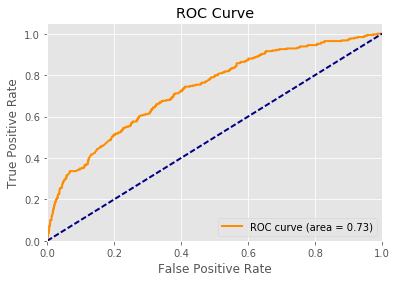

In [145]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_true, probas1, pos_label='low')

roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

CPU times: user 3.05 s, sys: 580 ms, total: 3.63 s
Wall time: 24.9 s


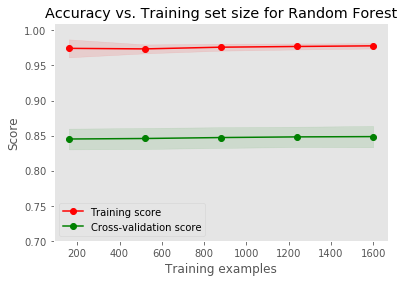

In [146]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
%time plot_learning_curve(RandomForestClassifier(), "Accuracy vs. Training set size for Random Forest", counts, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4);
plt.show()

In [142]:
count_vectorizer = CountVectorizer(stop_words='english')
X = count_vectorizer.fit_transform(reviews['summary'].values)
y = reviews['class'].values
#SMOTE
kbest = SelectKBest(k=50)
kbest.fit(X, y)
important = kbest.get_support(True)

In [131]:
clf = LogisticRegression()
clf.fit(X[:, important], y)
clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(X[:, important], y)
clf2 = RandomForestClassifier(random_state=1)
clf2.fit(X[:, important], y)
clf3 = GaussianNB()
clf3.fit(X.toarray()[:, important], y)
clf4 = tree.DecisionTreeClassifier()
clf4 = clf.fit(X,y)

In [102]:
scores = cross_val_score(clf, X, y)
print("Logisitc Regression score | %s" % (scores.mean()))
scores = cross_val_score(clf1, X, y)
print("KNN score | %s" % (scores.mean()))
scores = cross_val_score(clf2, X, y)
print("Random Forest score | %s" % (scores.mean()))
scores = cross_val_score(clf3, X.toarray(), y)
print("Naive Bayes | %s" % (scores.mean()))
scores = cross_val_score(clf4, X, y)
print("Decision Tree score | %s" % (scores.mean()))

Logisitc Regression score | 0.854501427965
KNN score | 0.84150567359
Random Forest score | 0.834993914454
Naive Bayes | 0.543013778396
Decision Tree score | 0.854501427965


In [103]:
for c, i in sorted(zip(clf.coef_[0], important.tolist()), reverse=True):
     print ("% 20s  | coef: %.2f" % (count_vectorizer.get_feature_names()[i], c))

               minus  | coef: 1.38
           beginners  | coef: 1.01
       advertisement  | coef: 0.64
               great  | coef: 0.62
             scenery  | coef: 0.57
             garbage  | coef: 0.53
                play  | coef: 0.43
               money  | coef: 0.40
              snooze  | coef: 0.38
                like  | coef: 0.33
                good  | coef: 0.33
       disappointing  | coef: 0.32
                 rip  | coef: 0.32
                  20  | coef: 0.28
            horrible  | coef: 0.26
                best  | coef: 0.25
            terrible  | coef: -0.03
                hype  | coef: -0.04
                lies  | coef: -0.04
         photography  | coef: -0.04
              boring  | coef: -0.05
                 bad  | coef: -0.05
                slow  | coef: -0.05
               movie  | coef: -0.05
              flawed  | coef: -0.06
            claption  | coef: -0.08
              acting  | coef: -0.08
             clapton  | coef: -0.12
        

Let's try to use some other data

In [102]:
ndf = df.tail(2000)
ndf = ndf[['summary', 'unixReviewTime', 'reviewText', 'reviewTime', 'helpful', 'overall']].dropna()
ndf['text_length'] = ndf['reviewText'].map(lambda text: len(text))
helpfulndf = ndf['helpful'].apply(pd.Series)
ndf['overall_helpfulness'] = helpfulndf[0] - helpfulndf[1]
ndf['class'] = ndf.overall.map (lambda x: 'high' if (x > 3) else 'low')
ndf['reviewMonth'] = pd.to_datetime(ndf.reviewTime,infer_datetime_format=True).dt.month

In [103]:
ndf.tail()

,summary,unixReviewTime,reviewText,reviewTime,helpful,overall,text_length,overall_helpfulness,class,reviewMonth
500171,"Excellent sound, very cheap, altos are rather ...",1405641600,"I'm very pleased with this recorder. Firstly, ...","07 18, 2014","[0, 0]",5.0,958,0,high,7
500172,... years than i care to remember - it's a won...,1404518400,i've been playing my m-4 for more years than i...,"07 5, 2014","[0, 0]",5.0,382,0,high,7
500173,great sound,1404518400,This is an exceptionally nice sounding guitar....,"07 5, 2014","[1, 1]",5.0,1133,0,high,7
500174,A great choice for my guitar,1355788800,It was a perfect retrofit for my guitar. I lov...,"12 18, 2012","[0, 0]",5.0,160,0,high,12
500175,"great, but difficult to install",1364860800,"great seller, so that was seamless. The picku...","04 2, 2013","[0, 0]",4.0,225,0,high,4


In [104]:
from pandas import to_datetime
import scipy as sp
reviews['reviewMonth'] = pd.to_datetime(reviews.reviewTime,infer_datetime_format=True).dt.month

X = sp.sparse.hstack((count_vectorizer.fit_transform(reviews.summary),reviews[['reviewMonth','text_length', 'overall_helpfulness']].values),format='csr')
X_columns=count_vectorizer.get_feature_names()+reviews[['reviewMonth','text_length', 'overall_helpfulness']].columns.tolist()

Xtest = sp.sparse.hstack((count_vectorizer.fit_transform(ndf.summary),ndf[['reviewMonth','text_length', 'overall_helpfulness']].values),format='csr')
Xtest_columns=count_vectorizer.get_feature_names()+reviews[['reviewMonth','text_length', 'overall_helpfulness']].columns.tolist()

ytest = ndf['class'].values

In [109]:
clf = LogisticRegression()
clf.fit(X, y)
clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(X, y)
clf2 = RandomForestClassifier(random_state=1)
clf2.fit(X, y)
clf3 = GaussianNB()
clf3.fit(X.toarray(), y)
clf4 = tree.DecisionTreeClassifier()
clf4 = clf4.fit(X,y)

In [204]:
scores = cross_val_score(clf, X, y)
print("Logisitic Regression score | %s" % (scores.mean()))
scores = cross_val_score(clf1, X, y)
print("KNN score | %s" % (scores.mean()))
scores = cross_val_score(clf2, X, y)
print("Random Forest score | %s" % (scores.mean()))
scores = cross_val_score(clf3, X.toarray(), y)
print("Naive Bayes | %s" % (scores.mean()))
scores = cross_val_score(clf4, X, y)
print("Decision Tree score | %s" % (scores.mean()))

Logisitic Regression score | 0.90251270761
KNN score | 0.839995167581
Random Forest score | 0.899015207111
Naive Bayes | 0.537013025019
Decision Tree score | 0.869517943731


In [205]:
scores = cross_val_score(clf, Xtest, ytest)
print("Logisitic Regression score | %s" % (scores.mean()))
scores = cross_val_score(clf1, Xtest, ytest)
print("KNN score | %s" % (scores.mean()))
scores = cross_val_score(clf2, Xtest, ytest)
print("Random Forest score | %s" % (scores.mean()))                    
scores = cross_val_score(clf3, Xtest.toarray(), ytest)
print("Naive Bayes | %s" % (scores.mean())) 
scores = cross_val_score(clf4, Xtest, ytest)
print("Decision Tree score | %s" % (scores.mean()))

Logisitic Regression score | 0.866003184594
KNN score | 0.758003880942
Random Forest score | 0.847507177342
Naive Bayes | 0.522999761381
Decision Tree score | 0.838498168333


In [113]:
from sklearn.model_selection import cross_val_predict
ypred = cross_val_predict(clf, Xtest, ytest)
ypred1 = cross_val_predict(clf1, Xtest, ytest)


In [209]:
print('LR')
print('Total reviews classified:', len(reviews))
print('Accuracy:', sum(scores)/len(scores))
print('Confusion matrix:')
print(confusion)
print(classification_report(ytest, cross_val_predict(clf, Xtest, ytest)))

LR
Total reviews classified: 2000
Accuracy: 0.838498168333
Confusion matrix:
[[1667   24]
 [ 272   37]]
             precision    recall  f1-score   support

       high       0.87      0.99      0.93      1689
        low       0.74      0.21      0.33       311

avg / total       0.85      0.87      0.83      2000



In [131]:
# (c) 2014 Reid Johnson
#
# Modified from:
# sklearn (https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/ensemble/weight_boosting.py)
#
# Generates a "boosted" ensemble of base models.

import copy
import operator
import sys, math, random
import numpy

from sklearn.base import ClassifierMixin
from sklearn.tree import DecisionTreeClassifier

class AdaBoostClassifier(ClassifierMixin):
    """An AdaBoost classifier.

    An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
    classifier on the original dataset and then fits additional copies of the
    classifier on the same dataset but where the weights of incorrectly
    classified instances are adjusted such that subsequent classifiers focus
    more on difficult cases.

    This class implements the algorithm known as AdaBoost-SAMME [2].

    Parameters
    ----------
    base_estimator : object, optional (default=DecisionTreeClassifier)
        The base estimator from which the boosted ensemble is built.
        Support for sample weighting is required, as well as proper `classes_`
        and `n_classes_` attributes.

    n_estimators : integer, optional (default=50)
        The maximum number of estimators at which boosting is terminated.
        In case of perfect fit, the learning procedure is stopped early.

    learning_rate : float, optional (default=1.)
        Learning rate shrinks the contribution of each classifier by
        ``learning_rate``. There is a trade-off between ``learning_rate`` and
        ``n_estimators``.

    algorithm : {'SAMME', 'SAMME.R'}, optional (default='SAMME.R')
        If 'SAMME.R' then use the SAMME.R real boosting algorithm.
        ``base_estimator`` must support calculation of class probabilities.
        If 'SAMME' then use the SAMME discrete boosting algorithm.
        The SAMME.R algorithm typically converges faster than SAMME,
        achieving a lower test error with fewer boosting iterations.

    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.

    Attributes
    ----------
    `estimators_` : list of classifiers
        The collection of fitted sub-estimators.

    `classes_` : array of shape = [n_classes]
        The classes labels.

    `n_classes_` : int
        The number of classes.

    `estimator_weights_` : array of floats
        Weights for each estimator in the boosted ensemble.

    `estimator_errors_` : array of floats
        Classification error for each estimator in the boosted
        ensemble.

    `feature_importances_` : array of shape = [n_features]
        The feature importances if supported by the ``base_estimator``.

    References
    ----------
    .. [1] Y. Freund, R. Schapire, "A Decision-Theoretic Generalization of
           on-Line Learning and an Application to Boosting", 1995.

    .. [2] J. Zhu, H. Zou, S. Rosset, T. Hastie, "Multi-class AdaBoost", 2009.

    """
    def __init__(self,
                 base_estimator=DecisionTreeClassifier(max_depth=1),
                 n_estimators=50,
                 estimator_params=tuple(),
                 learning_rate=1.,
                 algorithm='SAMME.R'):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.estimator_params = estimator_params
        self.learning_rate = learning_rate
        self.algorithm = algorithm

    def _make_estimator(self, append=True):
        """Make and configure a copy of the `base_estimator_` attribute.

        Warning: This method should be used to properly instantiate new
        sub-estimators.
        """
        estimator = copy.deepcopy(self.base_estimator)
        estimator.set_params(**dict((p, getattr(self, p))
                                    for p in self.estimator_params))

        if append:
            self.estimators_.append(estimator)

        return estimator

    def fit(self, X, y, sample_weight=None):
        # Check parameters.
        if self.learning_rate <= 0:
            raise ValueError("learning_rate must be greater than zero.")

        if sample_weight is None:
            # Initialize weights to 1 / n_samples.
            sample_weight = np.empty(X.shape[0], dtype=np.float)
            sample_weight[:] = 1. / X.shape[0]
        else:
            # Normalize existing weights.
            sample_weight = sample_weight / sample_weight.sum(dtype=np.float64)

        # Check that the sample weights sum is positive.
        if sample_weight.sum() <= 0:
            raise ValueError(
                "Attempting to fit with a non-positive "
                "weighted number of samples.")

        # Clear any previous fit results.
        self.estimators_ = []
        self.estimator_weights_ = np.zeros(self.n_estimators, dtype=np.float)
        self.estimator_errors_ = np.ones(self.n_estimators, dtype=np.float)

        for iboost in range(self.n_estimators):
            #print 'Iteration [%s]' % (iboost)

            # Fit the estimator.
            estimator = self._make_estimator()
            estimator.fit(X, y, sample_weight=sample_weight)

            if iboost == 0:
                self.classes_ = getattr(estimator, 'classes_', None)
                self.n_classes_ = len(self.classes_)

            # Generate estimator predictions.
            y_pred = estimator.predict(X)

            # Instances incorrectly classified.
            incorrect = y_pred != y

            # Error fraction.
            estimator_error = np.mean(
                np.average(incorrect, weights=sample_weight, axis=0))

            # Boost weight using multi-class AdaBoost SAMME alg.
            estimator_weight = self.learning_rate * (
                np.log((1. - estimator_error) / estimator_error) +
                np.log(self.n_classes_ - 1.))

            # Only boost the weights if there is another iteration of fitting.
            if not iboost == self.n_estimators - 1:
                # Only boost positive weights (exponential loss).
                sample_weight *= np.exp(estimator_weight * incorrect *
                                        ((sample_weight > 0) |
                                         (estimator_weight < 0)))

            self.estimator_weights_[iboost] = estimator_weight
            self.estimator_errors_[iboost] = estimator_error

    def _check_fitted(self):
        if not hasattr(self, "estimators_"):
            raise ValueError("Call 'fit' first.")

    def predict(self, X):
        X = numpy.array(X)
        N, d = X.shape
        pred = numpy.zeros(N)
        for estimator, w in zip(self.estimators_, self.estimator_weights_):
            pred += estimator.predict(X) * w
        pred /= self.estimator_weights_.sum()

        return pred

    def decision_function(self, X):
        """Compute the decision function of ``X``.

        Parameters
        ----------
        X : array-like of shape = [n_samples, n_features]
            The input samples.

        Returns
        -------
        score : array, shape = [n_samples, k]
            The decision function of the input samples. The order of
            outputs is the same of that of the `classes_` attribute.
            Binary classification is a special cases with ``k == 1``,
            otherwise ``k==n_classes``. For binary classification,
            values closer to -1 or 1 mean more like the first or second
            class in ``classes_``, respectively.
        """
        self._check_fitted()
        X = np.asarray(X)

        n_classes = self.n_classes_
        classes = self.classes_[:, np.newaxis]
        pred = None

        if self.algorithm == 'SAMME.R':
            # The weights are all 1. for SAMME.R
            pred = sum(_samme_proba(estimator, n_classes, X)
                       for estimator in self.estimators_)
        else:   # self.algorithm == "SAMME"
            pred = sum((estimator.predict(X) == classes).T * w
                       for estimator, w in zip(self.estimators_,
                                               self.estimator_weights_))

        pred /= self.estimator_weights_.sum()
        if n_classes == 2:
            pred[:, 0] *= -1
            return pred.sum(axis=1)
        return pred

    def predict(self, X):
        """Predict classes for X.

        The predicted class of an input sample is computed as the weighted mean
        prediction of the classifiers in the ensemble.

        Parameters
        ----------
        X : array-like of shape = [n_samples, n_features]
            The input samples.

        Returns
        -------
        y : array of shape = [n_samples]
            The predicted classes.
        """
        pred = self.decision_function(X)

        if self.n_classes_ == 2:
            return self.classes_.take(pred > 0, axis=0)

        return self.classes_.take(np.argmax(pred, axis=1), axis=0)

    def predict_proba(self, X):
        """Predict class probabilities for X.

        The predicted class probabilities of an input sample is computed as
        the weighted mean predicted class probabilities of the classifiers
        in the ensemble.

        Parameters
        ----------
        X : array-like of shape = [n_samples, n_features]
            The input samples.

        Returns
        -------
        p : array of shape = [n_samples]
            The class probabilities of the input samples. The order of
            outputs is the same of that of the `classes_` attribute.
        """
        X = np.asarray(X)
        n_classes = self.n_classes_

        if self.algorithm == 'SAMME.R':
            # The weights are all 1. for SAMME.R
            proba = sum(_samme_proba(estimator, n_classes, X)
                        for estimator in self.estimators_)
        else:   # self.algorithm == "SAMME"
            proba = sum(estimator.predict_proba(X) * w
                        for estimator, w in zip(self.estimators_,
                                                self.estimator_weights_))

        proba /= self.estimator_weights_.sum()
        proba = np.exp((1. / (n_classes - 1)) * proba)
        normalizer = proba.sum(axis=1)[:, np.newaxis]
        normalizer[normalizer == 0.0] = 1.0
        proba /= normalizer

        return proba

def _samme_proba(estimator, n_classes, X):
    """Calculate algorithm 4, step 2, equation c) of Zhu et al [1].

    References
    ----------
    .. [1] J. Zhu, H. Zou, S. Rosset, T. Hastie, "Multi-class AdaBoost", 2009.

    """
    proba = estimator.predict_proba(X)

    # Displace zero probabilities so the log is defined.
    # Also fix negative elements which may occur with
    # negative sample weights.
    proba[proba <= 0] = 1e-5
    log_proba = np.log(proba)

    return (n_classes - 1) * (log_proba - (1. / n_classes)
                           * log_proba.sum(axis=1)[:, np.newaxis])

In [132]:
import copy
import operator
import sys, math, random
import numpy

from sklearn.base import ClassifierMixin
from sklearn.tree import DecisionTreeClassifier

class LogitBoostClassifier(ClassifierMixin):
    """A LogitBoost classifier.

    A LogitBoost [1] classifier is a meta-estimator that begins by fitting a
    classifier on the original dataset and then fits additional copies of the
    classifier on the same dataset but where the weights of incorrectly
    classified instances are adjusted such that subsequent classifiers focus
    more on difficult cases.

    Parameters
    ----------
    base_estimator : object, optional (default=DecisionTreeClassifier)
        The base estimator from which the boosted ensemble is built.
        Support for sample weighting is required, as well as proper `classes_`
        and `n_classes_` attributes.

    n_estimators : integer, optional (default=50)
        The maximum number of estimators at which boosting is terminated.
        In case of perfect fit, the learning procedure is stopped early.

    learning_rate : float, optional (default=1.)
        Learning rate shrinks the contribution of each classifier by
        ``learning_rate``. There is a trade-off between ``learning_rate`` and
        ``n_estimators``.

    algorithm : {'SAMME', 'SAMME.R'}, optional (default='SAMME.R')
        If 'SAMME.R' then use the SAMME.R real boosting algorithm.
        ``base_estimator`` must support calculation of class probabilities.
        If 'SAMME' then use the SAMME discrete boosting algorithm.
        The SAMME.R algorithm typically converges faster than SAMME,
        achieving a lower test error with fewer boosting iterations.

    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.

    Attributes
    ----------
    `estimators_` : list of classifiers
        The collection of fitted sub-estimators.

    `classes_` : array of shape = [n_classes]
        The classes labels.

    `n_classes_` : int
        The number of classes.

    `estimator_weights_` : array of floats
        Weights for each estimator in the boosted ensemble.

    `estimator_errors_` : array of floats
        Classification error for each estimator in the boosted
        ensemble.

    `feature_importances_` : array of shape = [n_features]
        The feature importances if supported by the ``base_estimator``.

    References
    ----------
    .. [1] J. Friedman, T. Hastie, R. Tibshirani, "Additive Logistic Regression: 
           A Statistical View of Boosting", 2000.

    """
    def __init__(self,
                 base_estimator=DecisionTreeClassifier(max_depth=1),
                 n_estimators=50,
                 estimator_params=tuple(),
                 learning_rate=1.,
                 algorithm='SAMME.R'):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.estimator_params = estimator_params
        self.learning_rate = learning_rate
        self.algorithm = algorithm

    def _make_estimator(self, append=True):
        """Make and configure a copy of the `base_estimator_` attribute.

        Warning: This method should be used to properly instantiate new
        sub-estimators.
        """
        estimator = copy.deepcopy(self.base_estimator)
        estimator.set_params(**dict((p, getattr(self, p))
                                    for p in self.estimator_params))

        if append:
            self.estimators_.append(estimator)

        return estimator

    def fit(self, X, y, sample_weight=None):
        # Check parameters.
        if self.learning_rate <= 0:
            raise ValueError("learning_rate must be greater than zero.")

        if sample_weight is None:
            # Initialize weights to 1 / n_samples.
            sample_weight = np.empty(X.shape[0], dtype=np.float)
            sample_weight[:] = 1. / X.shape[0]
        else:
            # Normalize existing weights.
            sample_weight = sample_weight / sample_weight.sum(dtype=np.float64)

        # Check that the sample weights sum is positive.
        if sample_weight.sum() <= 0:
            raise ValueError(
                "Attempting to fit with a non-positive "
                "weighted number of samples.")

        # Clear any previous fit results.
        self.estimators_ = []
        self.estimator_weights_ = np.zeros(self.n_estimators, dtype=np.float)
        self.estimator_errors_ = np.ones(self.n_estimators, dtype=np.float)

        for iboost in range(self.n_estimators):
            #print 'Iteration [%s]' % (iboost)

            # Fit the estimator.
            estimator = self._make_estimator()
            estimator.fit(X, y, sample_weight=sample_weight)

            if iboost == 0:
                self.classes_ = getattr(estimator, 'classes_', None)
                self.n_classes_ = len(self.classes_)

            # Generate estimator predictions.
            y_pred = estimator.predict(X)

            # Instances incorrectly classified.
            incorrect = y_pred != y

            # Error fraction.
            estimator_error = np.mean(
                np.average(incorrect, weights=sample_weight, axis=0))

            # Boost weight using multi-class AdaBoost SAMME alg.
            estimator_weight = self.learning_rate * (
                np.log((1. - estimator_error) / estimator_error) +
                np.log(self.n_classes_ - 1.))

            # Only boost the weights if there is another iteration of fitting.
            if not iboost == self.n_estimators - 1:
                # Only boost positive weights (logistic loss).
                sample_weight *= np.log(1 + np.exp(estimator_weight * incorrect *
                                        ((sample_weight > 0) |
                                         (estimator_weight < 0))))

            self.estimator_weights_[iboost] = estimator_weight
            self.estimator_errors_[iboost] = estimator_error

    def _check_fitted(self):
        if not hasattr(self, "estimators_"):
            raise ValueError("Call 'fit' first.")

    def predict(self, X):
        X = numpy.array(X)
        N, d = X.shape
        pred = numpy.zeros(N)
        for estimator, w in zip(self.estimators_, self.estimator_weights_):
            pred += estimator.predict(X) * w
        pred /= self.estimator_weights_.sum()

        return pred

    def decision_function(self, X):
        """Compute the decision function of ``X``.

        Parameters
        ----------
        X : array-like of shape = [n_samples, n_features]
            The input samples.

        Returns
        -------
        score : array, shape = [n_samples, k]
            The decision function of the input samples. The order of
            outputs is the same of that of the `classes_` attribute.
            Binary classification is a special cases with ``k == 1``,
            otherwise ``k==n_classes``. For binary classification,
            values closer to -1 or 1 mean more like the first or second
            class in ``classes_``, respectively.
        """
        self._check_fitted()
        X = np.asarray(X)

        n_classes = self.n_classes_
        classes = self.classes_[:, np.newaxis]
        pred = None

        if self.algorithm == 'SAMME.R':
            # The weights are all 1. for SAMME.R
            pred = sum(_samme_proba(estimator, n_classes, X)
                       for estimator in self.estimators_)
        else:   # self.algorithm == "SAMME"
            pred = sum((estimator.predict(X) == classes).T * w
                       for estimator, w in zip(self.estimators_,
                                               self.estimator_weights_))

        pred /= self.estimator_weights_.sum()
        if n_classes == 2:
            pred[:, 0] *= -1
            return pred.sum(axis=1)
        return pred

    def predict(self, X):
        """Predict classes for X.

        The predicted class of an input sample is computed as the weighted mean
        prediction of the classifiers in the ensemble.

        Parameters
        ----------
        X : array-like of shape = [n_samples, n_features]
            The input samples.

        Returns
        -------
        y : array of shape = [n_samples]
            The predicted classes.
        """
        pred = self.decision_function(X)

        if self.n_classes_ == 2:
            return self.classes_.take(pred > 0, axis=0)

        return self.classes_.take(np.argmax(pred, axis=1), axis=0)

    def predict_proba(self, X):
        """Predict class probabilities for X.

        The predicted class probabilities of an input sample is computed as
        the weighted mean predicted class probabilities of the classifiers
        in the ensemble.

        Parameters
        ----------
        X : array-like of shape = [n_samples, n_features]
            The input samples.

        Returns
        -------
        p : array of shape = [n_samples]
            The class probabilities of the input samples. The order of
            outputs is the same of that of the `classes_` attribute.
        """
        X = np.asarray(X)
        n_classes = self.n_classes_

        if self.algorithm == 'SAMME.R':
            # The weights are all 1. for SAMME.R
            proba = sum(_samme_proba(estimator, n_classes, X)
                        for estimator in self.estimators_)
        else:   # self.algorithm == "SAMME"
            proba = sum(estimator.predict_proba(X) * w
                        for estimator, w in zip(self.estimators_,
                                                self.estimator_weights_))

        proba /= self.estimator_weights_.sum()
        proba = np.log(1 + np.exp((1. / (n_classes - 1)) * proba))
        normalizer = proba.sum(axis=1)[:, np.newaxis]
        normalizer[normalizer == 0.0] = 1.0
        proba /= normalizer

        return proba

def _samme_proba(estimator, n_classes, X):
    """Calculate algorithm 4, step 2, equation c) of Zhu et al [1].

    References
    ----------
    .. [1] J. Zhu, H. Zou, S. Rosset, T. Hastie, "Multi-class AdaBoost", 2009.

    """
    proba = estimator.predict_proba(X)

    # Displace zero probabilities so the log is defined.
    # Also fix negative elements which may occur with
    # negative sample weights.
    proba[proba <= 0] = 1e-5
    log_proba = np.log(proba)

    return (n_classes - 1) * (log_proba - (1. / n_classes)
                           * log_proba.sum(axis=1)[:, np.newaxis])

In [134]:
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(X_resampled, y_resampled)

lbc = LogitBoostClassifier(n_estimators=100)
lbc.fit(X_resampled, y_resampled)

In [181]:
from sklearn import metrics

X_test = tfidf_vectorizer.fit_transform(rdf['reviewText'].values)
example_counts = tfidf_vectorizer.transform(rdf['reviewText'].values)
y_test = rdf['class'].values
### Generate predictions with AdaBoost classifier. ###
abc.predict(X_test)

score = metrics.accuracy_score(y_test, abc.predict(X_test))
print ('AdaBoost Accuracy = %s' % (score))
print

### Generate predictions with LogitBoost classifier. ###

score = metrics.accuracy_score(y_test, lbc.predict(X_test))
print ('LogitBoost Accuracy = %s' % (score))
print

ValueError: setting an array element with a sequence.

In [ ]:

### Generate predictions with base (non-boosted) classifier. ###

score = metrics.accuracy_score(y_test, clf.predict(X_test))
print ('Base Classifier Accuracy = %s' % (score))
print

import sklearn.ensemble
clf2 = sklearn.ensemble.AdaBoostClassifier(n_estimators=100).fit(X_resampled, y_resampled)
score = metrics.accuracy_score(y_test, clf2.predict(X_test))
print ('sklearn AdaBoost Accuracy = %s' % (score))

In [129]:
from sklearn import metrics

### Generate predictions with AdaBoost classifier. ###

score = metrics.accuracy_score(y_test, abc.predict(X_test))
print ('AdaBoost Accuracy = %s' % (score))
print

### Generate predictions with LogitBoost classifier. ###

score = metrics.accuracy_score(y_test, lbc.predict(X_test))
print ('LogitBoost Accuracy = %s' % (score))
print

### Generate predictions with base (non-boosted) classifier. ###

score = metrics.accuracy_score(y_test, clf.predict(X_test))
print ('Base Classifier Accuracy = %s' % (score))
print

import sklearn.ensemble
clf2 = sklearn.ensemble.AdaBoostClassifier(n_estimators=100).fit(X_resampled, y_resampled)
score = metrics.accuracy_score(y_test, clf2.predict(X_test))
print ('sklearn AdaBoost Accuracy = %s' % (score))

#must merge to be a regressor, not classifier



ValueError: setting an array element with a sequence.